In [1]:
# Imports
import sys
sys.path.insert(1, '/users/wx21978/projects/pion-phys/pi0-analysis/analysis/')
import os
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from python.analysis import EventSelection, Plots, vector, PairSelection, Master, PFOSelection
from apps import photon_pairs
import time

In [2]:
plt_conf = Plots.PlotConfig()
plt_conf.SHOW_PLOT = True
plt_conf.SAVE_FOLDER = None
# plt_conf.BINS = 30

In [4]:
test_io = Master.IO("/storage/wx21978/pi0/root_files/cex/PDSPProd4a_MC_1GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03.root")

In [9]:
test_io_2 = Master.IO("/storage/wx21978/pi0/root_files/cex/PDSPProd4a_MC_1GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03.root",
                    _nEvents=100, _start=-1)

In [6]:
test_io.ListNTuples()

[
    'run',
    'subrun',
    'event',
    'MC',
    'reco_reconstructable_beam_event',
    'reco_beam_type',
    'reco_beam_startX',
    'reco_beam_startY',
    'reco_beam_startZ',
    'reco_beam_endX',
    'reco_beam_endY',
    'reco_beam_endZ',
    'true_beam_len',
    'reco_beam_len',
    'test_branch',
    'reco_beam_alt_len',
    'reco_beam_alt_len_allTrack',
    'reco_beam_calo_startX',
    'reco_beam_calo_startY',
    'reco_beam_calo_startZ',
    'reco_beam_calo_endX',
    'reco_beam_calo_endY',
    'reco_beam_calo_endZ',
    'reco_beam_calo_startX_allTrack',
    'reco_beam_calo_startY_allTrack',
    'reco_beam_calo_startZ_allTrack',
    'reco_beam_calo_endX_allTrack',
    'reco_beam_calo_endY_allTrack',
    'reco_beam_calo_endZ_allTrack',
    'reco_beam_calo_startDirX',
    'reco_beam_calo_startDirY',
    'reco_beam_calo_startDirZ',
    'reco_beam_calo_endDirX',
    'reco_beam_calo_endDirY',
    'reco_beam_calo_endDirZ',
    'reco_beam_trackDirX',
    'reco_beam_trackDirY',
    'reco_beam_trackDirZ',
    'reco_beam_trackEndDirX',
    'reco_beam_trackEndDirY',
    'reco_beam_trackEndDirZ',
    'reco_beam_vertex_nHits',
    'reco_beam_vertex_michel_score',
    'reco_beam_vertex_nHits_allTrack',
    'reco_beam_vertex_michel_score_allTrack',
    'reco_beam_vertex_michel_score_weight_by_charge',
    'reco_beam_vertex_michel_score_weight_by_charge_allTrack',
    'reco_beam_trackID',
    'n_beam_slices',
    'n_beam_particles',
    'beam_track_IDs',
    'beam_particle_scores',
    'reco_beam_dQdX_SCE',
    'reco_beam_EField_SCE',
    'reco_beam_calo_X',
    'reco_beam_calo_Y',
    'reco_beam_calo_Z',
    'reco_beam_calo_X_allTrack',
    'reco_beam_calo_Y_allTrack',
    'reco_beam_calo_Z_allTrack',
    'reco_beam_dQ',
    'reco_beam_dEdX_SCE',
    'reco_beam_calibrated_dEdX_SCE',
    'reco_beam_calibrated_dQdX_SCE',
    'reco_beam_resRange_SCE',
    'reco_beam_TrkPitch_SCE',
    'reco_beam_TrkPitch_SCE_allTrack',
    'reco_beam_dQdX_NoSCE',
    'reco_beam_dQ_NoSCE',
    'reco_beam_dEdX_NoSCE',
    'reco_beam_calibrated_dEdX_NoSCE',
    'reco_beam_resRange_NoSCE',
    'reco_beam_TrkPitch_NoSCE',
    'reco_beam_calo_wire',
    'reco_beam_calo_wire_allTrack',
    'reco_beam_calo_wire_z',
    'reco_beam_calo_wire_NoSCE',
    'reco_beam_calo_wire_z_NoSCE',
    'reco_beam_calo_tick',
    'reco_beam_calo_TPC',
    'reco_beam_calo_TPC_NoSCE',
    'reco_beam_flipped',
    'reco_beam_passes_beam_cuts',
    'reco_beam_PFP_ID',
    'reco_beam_PFP_nHits',
    'reco_beam_PFP_trackScore',
    'reco_beam_PFP_emScore',
    'reco_beam_PFP_michelScore',
    'reco_beam_PFP_trackScore_collection',
    'reco_beam_PFP_emScore_collection',
    'reco_beam_PFP_michelScore_collection',
    'reco_beam_PFP_trackScore_weight_by_charge',
    'reco_beam_PFP_emScore_weight_by_charge',
    'reco_beam_PFP_michelScore_weight_by_charge',
    'reco_beam_PFP_trackScore_collection_weight_by_charge',
    'reco_beam_PFP_emScore_collection_weight_by_charge',
    'reco_beam_PFP_michelScore_collection_weight_by_charge',
    'reco_beam_allTrack_ID',
    'reco_beam_allTrack_beam_cuts',
    'reco_beam_allTrack_flipped',
    'reco_beam_allTrack_len',
    'reco_beam_allTrack_startX',
    'reco_beam_allTrack_startY',
    'reco_beam_allTrack_startZ',
    'reco_beam_allTrack_endX',
    'reco_beam_allTrack_endY',
    'reco_beam_allTrack_endZ',
    'reco_beam_allTrack_trackDirX',
    'reco_beam_allTrack_trackDirY',
    'reco_beam_allTrack_trackDirZ',
    'reco_beam_allTrack_trackEndDirX',
    'reco_beam_allTrack_trackEndDirY',
    'reco_beam_allTrack_trackEndDirZ',
    'reco_beam_allTrack_resRange',
    'reco_beam_allTrack_calibrated_dEdX',
    'reco_beam_allTrack_Chi2_proton',
    'reco_beam_allTrack_Chi2_ndof',
    'reco_track_startX',
    'reco_track_startY',
    'reco_track_startZ',
    'reco_track_endX',
    'reco_track_endY',
    'reco_track_endZ',
    'reco_track_michel_score',
    'reco_track_michel_score_weight_by_charge',
    'reco_track_ID',
    'reco_track_nHits',
  

In [7]:
test_io_2.ListNTuples()

[
    'run',
    'subrun',
    'event',
    'MC',
    'reco_reconstructable_beam_event',
    'reco_beam_type',
    'reco_beam_startX',
    'reco_beam_startY',
    'reco_beam_startZ',
    'reco_beam_endX',
    'reco_beam_endY',
    'reco_beam_endZ',
    'true_beam_len',
    'reco_beam_len',
    'test_branch',
    'reco_beam_alt_len',
    'reco_beam_alt_len_allTrack',
    'reco_beam_calo_startX',
    'reco_beam_calo_startY',
    'reco_beam_calo_startZ',
    'reco_beam_calo_endX',
    'reco_beam_calo_endY',
    'reco_beam_calo_endZ',
    'reco_beam_calo_startX_allTrack',
    'reco_beam_calo_startY_allTrack',
    'reco_beam_calo_startZ_allTrack',
    'reco_beam_calo_endX_allTrack',
    'reco_beam_calo_endY_allTrack',
    'reco_beam_calo_endZ_allTrack',
    'reco_beam_calo_startDirX',
    'reco_beam_calo_startDirY',
    'reco_beam_calo_startDirZ',
    'reco_beam_calo_endDirX',
    'reco_beam_calo_endDirY',
    'reco_beam_calo_endDirZ',
    'reco_beam_trackDirX',
    'reco_beam_trackDirY',
    'reco_beam_trackDirZ',
    'reco_beam_trackEndDirX',
    'reco_beam_trackEndDirY',
    'reco_beam_trackEndDirZ',
    'reco_beam_vertex_nHits',
    'reco_beam_vertex_michel_score',
    'reco_beam_vertex_nHits_allTrack',
    'reco_beam_vertex_michel_score_allTrack',
    'reco_beam_vertex_michel_score_weight_by_charge',
    'reco_beam_vertex_michel_score_weight_by_charge_allTrack',
    'reco_beam_trackID',
    'n_beam_slices',
    'n_beam_particles',
    'beam_track_IDs',
    'beam_particle_scores',
    'reco_beam_dQdX_SCE',
    'reco_beam_EField_SCE',
    'reco_beam_calo_X',
    'reco_beam_calo_Y',
    'reco_beam_calo_Z',
    'reco_beam_calo_X_allTrack',
    'reco_beam_calo_Y_allTrack',
    'reco_beam_calo_Z_allTrack',
    'reco_beam_dQ',
    'reco_beam_dEdX_SCE',
    'reco_beam_calibrated_dEdX_SCE',
    'reco_beam_calibrated_dQdX_SCE',
    'reco_beam_resRange_SCE',
    'reco_beam_TrkPitch_SCE',
    'reco_beam_TrkPitch_SCE_allTrack',
    'reco_beam_dQdX_NoSCE',
    'reco_beam_dQ_NoSCE',
    'reco_beam_dEdX_NoSCE',
    'reco_beam_calibrated_dEdX_NoSCE',
    'reco_beam_resRange_NoSCE',
    'reco_beam_TrkPitch_NoSCE',
    'reco_beam_calo_wire',
    'reco_beam_calo_wire_allTrack',
    'reco_beam_calo_wire_z',
    'reco_beam_calo_wire_NoSCE',
    'reco_beam_calo_wire_z_NoSCE',
    'reco_beam_calo_tick',
    'reco_beam_calo_TPC',
    'reco_beam_calo_TPC_NoSCE',
    'reco_beam_flipped',
    'reco_beam_passes_beam_cuts',
    'reco_beam_PFP_ID',
    'reco_beam_PFP_nHits',
    'reco_beam_PFP_trackScore',
    'reco_beam_PFP_emScore',
    'reco_beam_PFP_michelScore',
    'reco_beam_PFP_trackScore_collection',
    'reco_beam_PFP_emScore_collection',
    'reco_beam_PFP_michelScore_collection',
    'reco_beam_PFP_trackScore_weight_by_charge',
    'reco_beam_PFP_emScore_weight_by_charge',
    'reco_beam_PFP_michelScore_weight_by_charge',
    'reco_beam_PFP_trackScore_collection_weight_by_charge',
    'reco_beam_PFP_emScore_collection_weight_by_charge',
    'reco_beam_PFP_michelScore_collection_weight_by_charge',
    'reco_beam_allTrack_ID',
    'reco_beam_allTrack_beam_cuts',
    'reco_beam_allTrack_flipped',
    'reco_beam_allTrack_len',
    'reco_beam_allTrack_startX',
    'reco_beam_allTrack_startY',
    'reco_beam_allTrack_startZ',
    'reco_beam_allTrack_endX',
    'reco_beam_allTrack_endY',
    'reco_beam_allTrack_endZ',
    'reco_beam_allTrack_trackDirX',
    'reco_beam_allTrack_trackDirY',
    'reco_beam_allTrack_trackDirZ',
    'reco_beam_allTrack_trackEndDirX',
    'reco_beam_allTrack_trackEndDirY',
    'reco_beam_allTrack_trackEndDirZ',
    'reco_beam_allTrack_resRange',
    'reco_beam_allTrack_calibrated_dEdX',
    'reco_beam_allTrack_Chi2_proton',
    'reco_beam_allTrack_Chi2_ndof',
    'reco_track_startX',
    'reco_track_startY',
    'reco_track_startZ',
    'reco_track_endX',
    'reco_track_endY',
    'reco_track_endZ',
    'reco_track_michel_score',
    'reco_track_michel_score_weight_by_charge',
    'reco_track_ID',
    'reco_track_nHits',
  

In [11]:
test_io.Get("g4_mother_Pdg")

In [10]:
test_io_2.Get("g4_mother_Pdg")

In [3]:
evts = EventSelection.load_and_cut_data(
    "/storage/wx21978/pi0/root_files/cex/PDSPProd4a_MC_1GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03.root",
    ntuple_type = "PDSPAnalyser",
    batch_size = 1000, batch_start = 0,
    valid_momenta=True,
    cnn_cut=0.,#0.5,
    n_hits_cut=0,#80,
    distance_bounds_cm=None,#(3,90),
    max_impact_cm=None,#20,
    beam_slice_cut=False)

FilterVariable started

FilterVariable started

number of entries before|after PiBeamSelection: 1000|490


FilterVariable started

number of entries before|after PandoraTagCut: 1000|835


FilterVariable started

number of entries before|after CaloSizeCut: 1000|835


FilterVariable started

FilterVariable started

number of entries before|after MichelScoreCut: 1000|765


FilterVariable started

FilterVariable started

number of entries before|after BeamQualityCut: 1000|605
number of entries before|after APA3Cut: 1000|874


FilterVariable started

number of entries before|after MedianDEdXCut: 1000|706
                 number of events which pass the cut  single efficiency  \
no selection                                  1000.0              100.0   
PiBeamSelection                                490.0               49.0   
PandoraTagCut                                  835.0               83.5   
CaloSizeCut                                    835.0               83.5   
MichelScoreCut                                 765.0               76.5   
BeamQualityCut                                 605.0               60.5   
APA3Cut                                        874.0               87.4   
MedianDEdXCut                                  706.0               70.6   

                 number of events after successive cuts  \
no selection                                     1000.0   
PiBeamSelection                                   490.0   
PandoraTagCut                                     488.0   
CaloSizeCut                      

FilterVariable started

Before setattr in FilterVariable

Done setattr in FilterVariable

FilterVariable started

Before setattr in FilterVariable

Done setattr in FilterVariable

number of entries before|after ValidRecoPositionCut: 558|534


FilterVariable started

Before setattr in FilterVariable

Done setattr in FilterVariable

FilterVariable started

Before setattr in FilterVariable

Done setattr in FilterVariable

number of entries before|after ValidRecoMomentumCut: 558|494
number of entries before|after ValidRecoEnergyCut: 558|494
Valid momenta (reco) done in 146.59376192092896s
PFOs >= 2 (reco) done in 0.014589548110961914s
         Event selection  Number of PFOs  Average PFOs per event  Number of events  Percentage of events remaining
0           no selection            1384                1.384000              1000                           100.0
1  Beam selection (reco)             558                2.113636               264                            26.4
2   Valid momenta (reco)             494                1.871212               264                            26.4
3       PFOs >= 2 (reco)             406                2.653595               153                            15.3


In [26]:
evts = EventSelection.load_and_cut_data(
    "/storage/wx21978/pi0/root_files/cex/PDSPProd4a_MC_1GeV_reco1_sce_datadriven_v1_ntuple_v09_41_00_03.root",
    ntuple_type = "PDSPAnalyser",
    batch_size = -1, batch_start = -1,
    valid_momenta=True,
    cnn_cut=0.,#0.5,
    n_hits_cut=0,#80,
    distance_bounds_cm=None,#(3,90),
    max_impact_cm=None,#20,
    at_least_2_pfos=False,
    beam_slice_cut=False)

number of entries before|after PiBeamSelection: 298194|170238
number of entries before|after PandoraTagCut: 298194|245977
number of entries before|after CaloSizeCut: 298194|247361
number of entries before|after MichelScoreCut: 298194|230193
number of entries before|after BeamQualityCut: 298194|182491
number of entries before|after APA3Cut: 298194|270725
number of entries before|after MedianDEdXCut: 298194|198023
                 number of events which pass the cut  single efficiency  \
no selection                                298194.0         100.000000   
PiBeamSelection                             170238.0          57.089680   
PandoraTagCut                               245977.0          82.488917   
CaloSizeCut                                 247361.0          82.953044   
MichelScoreCut                              230193.0          77.195718   
BeamQualityCut                              182491.0          61.198750   
APA3Cut                                     270725.0       

In [27]:
ak.sum(Master.NPFPMask(evts, -1))

44505

In [6]:
def gen_inverse_mask(mask):
    return ak.Array(map(lambda e: np.squeeze(np.argwhere(e), axis=1), mask))

def get_pairs_from_mask(mask):
    return ak.combinations(gen_inverse_mask(mask), 2)

In [92]:
list(map(lambda e: np.argwhere(e), photons_mask))[373]

<Array [[42], [45], [55]] type='3 * 1 * int64'>

In [97]:
np.squeeze(np.argwhere(photons_mask[373]))

<Array [42, 45, 55] type='3 * int64'>

In [106]:
inv_photon_mask = gen_inverse_mask(photons_mask)

In [107]:
inv_photon_mask[58]

<Array [72, 103] type='2 * int64'>

In [58]:
photons_mask

<Array [[False, False, ... False, False]] type='6067 * var * bool'>

In [14]:
def select_reco_pi0_events(evts, photon_mask, mass_cut=(50, 250), opening_angle_deg=(10, 80), only_two_photons=False):
    pairs = Master.ShowerPairs(evts, shower_pair_mask=photon_mask)

    pass_angle = np.logical_and(
        pairs.reco_angle > opening_angle_deg[0]*np.pi/180,
        pairs.reco_angle < opening_angle_deg[1]*np.pi/180)
    pass_mass = np.logical_and(
        pairs.reco_mass > mass_cut[0],
        pairs.reco_mass < mass_cut[1])

    full_pass = np.logical_and(pass_angle, pass_mass)

    if only_two_photons:
        number = np.logical_and(
            ak.sum(full_pass, axis=1),
            ak.num(pairs.pairs['0']) == 1)
        number = ak.values_astype(number, int)
    else:
        number = ak.sum(full_pass, axis=1)

    return number
    

In [18]:
pair_cos = ak.argcombinations(ak.Array([[0,1,2,3]]), 2)
masses = ak.Array([[200, 150, 175, 130, 100, 60]])
angles = ak.Array([[60, 45, 50, 20, 18, 25]])

In [20]:
pi0_mass = 139.57039
print(ak.argsort(np.abs(masses-pi0_mass)))

[[3, 1, 2, 4, 0, 5]]


In [15]:
counts_full = select_reco_pi0_events(evts, photons_mask)
counts_two  = select_reco_pi0_events(evts, photons_mask, only_two_photons=True)

In [16]:
np.unique(counts_full, return_counts=True)

(array([0, 1, 2, 3, 6]), array([5927,  125,   10,    3,    2]))

In [17]:
np.unique(counts_two, return_counts=True)

(array([0, 1]), array([5946,  121]))

In [4]:
photons_mask = PFOSelection.InitialPi0PhotonSelection(evts)

number of entries before|after EMScoreCut: 1573021|1195922
number of entries before|after NHitsCut: 1573021|408478
number of entries before|after BeamParticleDistanceCut: 1573021|34192
number of entries before|after BeamParticleIPCut: 1573021|19005
number of entries before|after VetoBeamParticle: 1573021|1566955


In [7]:
def count_pi0_candidates(
        events,
        mass_cut=(50, 250),
        opening_angle_deg=(10, 80),
        exactly_two_photons=False,
        shower_pairs=None,
        photon_mask=None,
        pair_coords=None):
    """
    Returns the number of truth pi0 particles which decay to yy in each
    event in `events`.

    pi0 -> yy

    Parameters
    ----------
    events : Data
        Events in which to count pi0 occurances.
    beam_daughters : boolean, optional
        Whether to only accept a pi0 if it is a daughter of the beam
        particle. Default is True.

    Returns
    -------
    counts : ak.Array
        Array containing the number of occurances of pi0 -> yy for each
        event.
    """
    def get_two_count_pi0s(pi0s):
        pions, counts = np.unique(pi0s, return_counts=True)
        return pions[counts == 2]

    if shower_pairs is None:
        if pair_coords is not None:
            shower_pairs = Master.ShowerPairs(events,
                                              pair_coords=pair_coords)
        elif photon_mask is not None:
            shower_pairs = Master.ShowerPairs(events,
                                              shower_pair_mask=photon_mask)
        else:
            shower_pairs = Master.ShowerPairs(
                events,
                shower_pair_mask=PFOSelection.InitialPi0PhotonSelection(
                    events))
    
    pass_angle = np.logical_and(
        shower_pairs.reco_angle > opening_angle_deg[0]*np.pi/180,
        shower_pairs.reco_angle < opening_angle_deg[1]*np.pi/180)
    pass_mass = np.logical_and(
        shower_pairs.reco_mass > mass_cut[0],
        shower_pairs.reco_mass < mass_cut[1])

    full_pass = np.logical_and(pass_angle, pass_mass)

    if exactly_two_photons:
        number = np.logical_and(
            ak.sum(full_pass, axis=1),
            ak.num(shower_pairs.pairs['0']) == 1)
        counts = ak.values_astype(number, int)
    else:
        counts = ak.sum(full_pass, axis=1)
    return counts


def count_charged_pi_candidates(
        events,
        track_cut=None,
        n_hits_cut=None,
        dEdX_cuts=None,
        min_dEdX=None,
        max_dEdX=None,
        reco_pi_mask=None):
    """
    Returns the number of pi+ particles identified from reconstructed
    PFOs for each event in `events`.

    Parameters
    ----------
    events : Data
        Events in which to count pi+ occurances.
    track_cut : float, optional
        Track score required for pi+ candidates. If not set, the
        default value in the `PFOSelection` module is used.
    n_hits_cut : int, optional
        Minimum number of hits required in pi+ candidates. If not set,
        the default value in the `PFOSelection` module is used.
    dEdX_cuts : tuple (lower, upper), optional
        Lower and upper bounds for energy deposition rate required by
        pi+ candidates. If not set, the default values in the
        `PFOSelection` module is used.
    min_dEdX : float, optional
        Minimum energy deposition rate required by pi+ candidates. If
        not set, the default value in the `PFOSelection` module is 
        used. Overwritten by `dEdX_cuts` if specified.
    max_dEdX : float, optional
        Maximum energy deposition rate required by pi+ candidates. If
        not set, the default value in the `PFOSelection` module is 
        used. Overwritten by `dEdX_cuts` if specified.

    Returns
    -------
    counts : ak.Array
        Array containing the number of pi+ particles for each event.
    """
    if reco_pi_mask is None:
        selection_kwargs = {}
        if track_cut is not None:
            selection_kwargs.update({"track_cut":track_cut})
        if n_hits_cut is not None:
            selection_kwargs.update({"n_hits_cut":n_hits_cut})
        if dEdX_cuts is not None:
            min_dEdX = dEdX_cuts[0]
            max_dEdX = dEdX_cuts[1]
        if min_dEdX is not None:
            selection_kwargs.update({"min_dEdX":min_dEdX})
        if max_dEdX is not None:
            selection_kwargs.update({"max_dEdX":max_dEdX})
        reco_pi_mask = PFOSelection.DaughterPiPlusSelection(
            events, **selection_kwargs)
    return ak.sum(reco_pi_mask, axis=-1)


def _generate_selection(cut):
    if isinstance(cut, tuple):
        if len(cut) == 1:
            return lambda count: count >= cut[0]
        elif len(cut) == 2:
            return lambda count: np.logical_and(
                count >= min(cut), count <= max(cut))
        else:
            raise ValueError(f"Cut tuple {cut} must contain 1 or 2 values.")
    elif cut is None:
        return lambda count: True
    else:
        return lambda count: count == cut


def generate_reco_tags(
    events : Master.Data,
    n_pi0,
    n_pi_charged,
    exactly_two_photons=True,
    pi0_count=None,
    pi_charged_count=None):
    """
    Generates a True/False tag for each event in `events` indicating
    whether they pass the truth level requirements of `n_pi0` and
    `n_pi_charged`.

    `n_pi0` and `n_pi_charged` may be integers, tuples, or None. If
    integer, only the specified number of occurances is selected. If a
    tuple of length 1, any events with occurances greater than or equal
    to the value in the tupled are selected. If a tuple of two values, 
    he number of occurances must be equal to or between the values in
    the tuple. If None, no cut will be applied.

    Parameters
    ----------
    events : Data
        Events to be tagged.
    n_pi0 : None, int, or tuple
        Required number of pi0s that decay into two photons in an event
        for the event to pass the tag.
    n_pi_charged : None, int, or tuple
        Required number of non-beam pi+ particles in an event for the
        event to pass the tag.

    Returns
    -------
    tag : ak.Array
        Array matching the number of events in `events` containing a
        boolean of whether each event is selected by the tag.
    """
    pi0_cut: function = _generate_selection(n_pi0)
    pi_charged_cut: function = _generate_selection(n_pi_charged)
    if pi0_count is None:
        pi0_count = count_pi0_candidates(
            events, exactly_two_photons=exactly_two_photons)
    if pi_charged_count is None:
        pi_charged_count = count_charged_pi_candidates(events)
    return np.logical_and(pi0_cut(pi0_count),
                          pi_charged_cut(pi_charged_count))

In [8]:
ak.sum(generate_reco_tags(evts, 1, 0))

number of entries before|after EMScoreCut: 118421|41034
number of entries before|after NHitsCut: 118421|63848
number of entries before|after BeamParticleDistanceCut: 118421|108461
number of entries before|after BeamParticleIPCut: 118421|80448
number of entries before|after VetoBeamParticle: 118421|118421
number of entries before|after TrackScoreCut: 118421|77262
number of entries before|after NHitsCut: 118421|106195
number of entries before|after PiPlusSelection: 118421|54038


1172

In [4]:
reco_pi0_counts = EventSelection.count_pi0_candidates(evts)
reco_pi_plus_counts = EventSelection.count_charged_pi_candidates(evts)
tags = {
    "Charge ex. 1pi0, 0pi+": EventSelection.generate_reco_tags(evts, 1, 0, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts),
    "Charge ex. Xpi0, 0pi+": EventSelection.generate_reco_tags(evts, (1,), 0, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts),
    "Absorbtion 0pi0, 0pi+": EventSelection.generate_reco_tags(evts, 0, 0, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts),
    "Pion production 0pi0, Xpi+": EventSelection.generate_reco_tags(evts, 0, (1,), pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts),
    "Pion production Xpi0, Xpi+": EventSelection.generate_reco_tags(evts, (1,), (1,), pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts),
    "Inclusive pi0 signal Xpi0, 0/Xpi+": EventSelection.generate_reco_tags(evts, (1,), None, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts)}

for label in tags.keys():
    print(f"{ak.sum(tags[label])} events of type: {label}.")

number of entries before|after EMScoreCut: 119035|41398
number of entries before|after NHitsCut: 119035|64175
number of entries before|after BeamParticleDistanceCut: 119035|109016
number of entries before|after BeamParticleIPCut: 119035|80805
number of entries before|after VetoBeamParticle: 119035|119035
number of entries before|after TrackScoreCut: 119035|77512
number of entries before|after NHitsCut: 119035|106761
number of entries before|after PiPlusSelection: 119035|54390
1232 events of type: Charge ex. 1pi0, 0pi+.
1309 events of type: Charge ex. Xpi0, 0pi+.
23124 events of type: Absorbtion 0pi0, 0pi+.
19890 events of type: Pion production 0pi0, Xpi+.
182 events of type: Pion production Xpi0, Xpi+.
1491 events of type: Inclusive pi0 signal Xpi0, 0/Xpi+.


In [5]:
truth_pi0_counts = EventSelection.count_diphoton_decays(evts)
truth_pi_plus_counts = EventSelection.count_non_beam_charged_pi(evts)
tags = {
    "Charge ex. 1pi0, 0pi+": EventSelection.generate_truth_tags(evts, 1, 0, pi0_count=truth_pi0_counts, pi_charged_count=truth_pi_plus_counts),
    "Charge ex. Xpi0, 0pi+": EventSelection.generate_truth_tags(evts, (1,), 0, pi0_count=truth_pi0_counts, pi_charged_count=truth_pi_plus_counts),
    "Absorbtion 0pi0, 0pi+": EventSelection.generate_truth_tags(evts, 0, 0, pi0_count=truth_pi0_counts, pi_charged_count=truth_pi_plus_counts),
    "Pion production 0pi0, Xpi+": EventSelection.generate_truth_tags(evts, 0, (1,), pi0_count=truth_pi0_counts, pi_charged_count=truth_pi_plus_counts),
    "Pion production Xpi0, Xpi+": EventSelection.generate_truth_tags(evts, (1,), (1,), pi0_count=truth_pi0_counts, pi_charged_count=truth_pi_plus_counts),
    "Inclusive pi0 signal Xpi0, 0/Xpi+": EventSelection.generate_truth_tags(evts, (1,), None, pi0_count=truth_pi0_counts, pi_charged_count=truth_pi_plus_counts)}

for label in tags.keys():
    print(f"{ak.sum(tags[label])} events of type: {label}.")

7304 events of type: Charge ex. 1pi0, 0pi+.
8422 events of type: Charge ex. Xpi0, 0pi+.
15111 events of type: Absorbtion 0pi0, 0pi+.
17684 events of type: Pion production 0pi0, Xpi+.
3288 events of type: Pion production Xpi0, Xpi+.
11710 events of type: Inclusive pi0 signal Xpi0, 0/Xpi+.


In [14]:
from importlib import reload
reload(EventSelection)

<module 'python.analysis.EventSelection' from '/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/EventSelection.py'>

In [6]:
# reco_pi0_counts = EventSelection.count_pi0_candidates(evts)
reco_pi_plus_counts_mom_cut = EventSelection.count_charged_pi_candidates(evts,energy_cut=150)
tags = {
    "Charge ex. 1pi0, 0pi+": EventSelection.generate_reco_tags(evts, 1, 0, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts_mom_cut),
    "Charge ex. Xpi0, 0pi+": EventSelection.generate_reco_tags(evts, (1,), 0, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts_mom_cut),
    "Absorbtion 0pi0, 0pi+": EventSelection.generate_reco_tags(evts, 0, 0, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts_mom_cut),
    "Pion production 0pi0, Xpi+": EventSelection.generate_reco_tags(evts, 0, (1,), pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts_mom_cut),
    "Pion production Xpi0, Xpi+": EventSelection.generate_reco_tags(evts, (1,), (1,), pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts_mom_cut),
    "Inclusive pi0 signal Xpi0, 0/Xpi+": EventSelection.generate_reco_tags(evts, (1,), None, pi0_count=reco_pi0_counts, pi_charged_count=reco_pi_plus_counts_mom_cut)}

for label in tags.keys():
    print(f"{ak.sum(tags[label])} events of type: {label}.")

number of entries before|after TrackScoreCut: 119035|77512
number of entries before|after NHitsCut: 119035|106761
number of entries before|after PiPlusSelection: 119035|54390
1348 events of type: Charge ex. 1pi0, 0pi+.
1427 events of type: Charge ex. Xpi0, 0pi+.
31114 events of type: Absorbtion 0pi0, 0pi+.
11900 events of type: Pion production 0pi0, Xpi+.
64 events of type: Pion production Xpi0, Xpi+.
1491 events of type: Inclusive pi0 signal Xpi0, 0/Xpi+.


In [7]:
reco_pi0_counts_two = EventSelection.count_pi0_candidates(evts, exactly_two_photons=True)

number of entries before|after EMScoreCut: 119035|41398
number of entries before|after NHitsCut: 119035|64175
number of entries before|after BeamParticleDistanceCut: 119035|109016
number of entries before|after BeamParticleIPCut: 119035|80805
number of entries before|after VetoBeamParticle: 119035|119035


In [209]:
from importlib import reload
reload(Plots)
reload(EventSelection)

<module 'python.analysis.EventSelection' from '/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/EventSelection.py'>

In [205]:
def create_regions(pi0_counts, pi_charged_counts):
    regions_dict = {
        "absorption": np.logical_and(pi0_counts==0, pi_charged_counts==0),
        "charge_exchange": np.logical_and(pi0_counts==1, pi_charged_counts==0),
        "pion_prod_0_pi0": np.logical_and(pi0_counts==0, pi_charged_counts>=1),
        "pion_prod_1_pi0": np.logical_and(pi0_counts==1, pi_charged_counts>=1),
        "pion_prod_>1_pi0": pi0_counts>=2
    }
    return regions_dict

def get_colour_mapper(min, max, cmap_type="autumn"):
    cmap = plt.get_cmap(cmap_type)
    def get_colour(value):
        return cmap((value-min)/(max-min))
    return get_colour

def sigmoid(x):
    return 1/(1+np.exp(-x))

def adjust_text_colour(value, colour, norm):
    scaling = 1-np.round(norm(value)+0.2) * 0.7
    return tuple(val * scaling for val in colour)

def plot_region_data(regions_dict, plt_cfg=plt_conf, title=None, compare_max=0, log_norm=False, colourblind=False):
    x = np.array([0, 0, 1, 1, 2, 2])
    y = np.array([0, 1, 0, 1, 0, 1])
    pi_prod_multi_pi0 = ak.sum(regions_dict["pion_prod_>1_pi0"])
    weights = np.array([
        ak.sum(regions_dict["absorption"]),
        ak.sum(regions_dict["pion_prod_0_pi0"]),
        ak.sum(regions_dict["charge_exchange"]),
        ak.sum(regions_dict["pion_prod_1_pi0"]),
        pi_prod_multi_pi0,
        pi_prod_multi_pi0])
    
    setup_kwargs = {}
    if title is not None:
        setup_kwargs.update({"title":title})

    text_kwargs = {
        "fontsize":16,
        "fontweight":"demibold",
        "horizontalalignment":"center"}
    if colourblind:
        colour=(0.55, 0.8, 1)
    else:
        colour = (1, 0.65, 0.8)

    plt_cfg.setup_figure(figsize=(14,8), **setup_kwargs)
    if log_norm:
        cnorm = mpl.colors.LogNorm(vmin=1, vmax=max(np.max(weights), compare_max))
    else:
        cnorm = mpl.colors.Normalize(vmin=0, vmax=max(np.max(weights), compare_max))
    cmap = plt.get_cmap("pink")
    plt.hist2d(x, y, weights=weights, range=[[-0.5, 2.5],[-0.5, 1.5]], bins=[3,2], norm=cnorm, cmap=cmap)
    plt.text(0,-0.05,f"Absorption\n{weights[0]}", **text_kwargs, color=adjust_text_colour(weights[0], colour, cnorm))
    plt.text(0,0.9,f"Pion production,\n0 pi0\n{weights[1]}", **text_kwargs, color=adjust_text_colour(weights[1], colour, cnorm))
    plt.text(1,-0.05,f"Charge exchange\n{weights[2]}", **text_kwargs, color=adjust_text_colour(weights[2], colour, cnorm))
    plt.text(1,0.9,f"Pion production,\n1 pi0\n{weights[3]}", **text_kwargs, color=adjust_text_colour(weights[3], colour, cnorm))
    plt.text(2,0.4,f"Pion production,\n>1 pi0\n{weights[4]}", **text_kwargs, color=adjust_text_colour(weights[4], colour, cnorm))
    plt_cfg.format_axis(legend=False, xlabel="Number of pi0", ylabel="Number of pi+")
    plt.xticks(ticks=[0, 1, 2], labels=["0", "1", ">1"], minor=False)
    plt.yticks(ticks=[0, 1], labels=["0", ">=1"], minor=False)
    plt.minorticks_off()
    cbar = plt.colorbar()
    cbar.ax.set_ylabel("Number of events", rotation=90)
    plt_cfg.end_plot()


def compare_truth_reco_regions(reco_regions, truth_regions, plt_cfg=plt_conf, title=None, compare_max=0, log_norm=False, colourblind=False):
    index_dict = {
        "absorption":0,
        "charge_exchange":1,
        "pion_prod_0_pi0":2,
        "pion_prod_1_pi0":3,
        "pion_prod_>1_pi0":4}
    tick_labels = [
        "absorbtion", "cex.", "pi+ prod (0)", "pi+ prod (1)", "pi+ prod (>1)"]
    ytick_labels = tick_labels.copy()
    values = np.repeat(np.expand_dims(np.arange(5, dtype=float),1), 5, axis=1)
    x = values.flatten("C")
    y = values.flatten("F")

    num_events = len(list(truth_regions.values())[0])

    for key_truth in truth_regions.keys():
        truth_i = index_dict[key_truth]
        truth_count = np.sum(truth_regions[key_truth])
        ytick_labels[truth_i] += f"\n{truth_count} events\n({100*truth_count/num_events:.1f}% of total)"
        for key_reco in reco_regions.keys():
            reco_i = index_dict[key_reco]
            values[reco_i, truth_i] = 100*np.sum(
                np.logical_and(reco_regions[key_reco],
                               truth_regions[key_truth]))/truth_count

    values = values.flatten("C")

    setup_kwargs = {}
    if title is not None:
        setup_kwargs.update({"title":title})

    text_kwargs = {
        # "fontsize":16,
        "fontweight":"semibold",
        "horizontalalignment":"center"}
    if colourblind:
        colour=(0.55, 0.8, 1)
    else:
        colour = (1, 0.65, 0.8)

    plt_cfg.setup_figure(figsize=(16,12), **setup_kwargs)
    if log_norm:
        cnorm = mpl.colors.LogNorm(vmin=1, vmax=100)
    else:
        cnorm = mpl.colors.Normalize(vmin=0, vmax=100)
    cmap = plt.get_cmap("pink")
    plt.hist2d(x, y, weights=values, range=[[-0.5, 4.5],[-0.5, 4.5]], bins=[5,5], norm=cnorm, cmap=cmap)
    for i, val in enumerate(values):
        plt.text(i//5, i%5, f"{val:.1f}%", **text_kwargs, color=adjust_text_colour(val, colour, cnorm))
    plt_cfg.format_axis(legend=False, xlabel="Reco classifcation", ylabel="Truth classifcation")
    plt.xticks(ticks=list(index_dict.values()), labels=tick_labels, minor=False)
    plt.yticks(ticks=list(index_dict.values()), labels=ytick_labels, minor=False)
    plt.minorticks_off()
    cbar = plt.colorbar()
    cbar.ax.set_ylabel("% of events from the truth region", rotation=90)
    plt_cfg.end_plot()
    

In [8]:
reco_regions = EventSelection.create_regions(reco_pi0_counts, reco_pi_plus_counts)
reco_regions_mom_cut = EventSelection.create_regions(reco_pi0_counts, reco_pi_plus_counts_mom_cut)
reco_regions_two = EventSelection.create_regions(reco_pi0_counts_two, reco_pi_plus_counts)
reco_regions_mom_cut_two = EventSelection.create_regions(reco_pi0_counts_two, reco_pi_plus_counts_mom_cut)
truth_regions = EventSelection.create_regions(truth_pi0_counts, truth_pi_plus_counts)

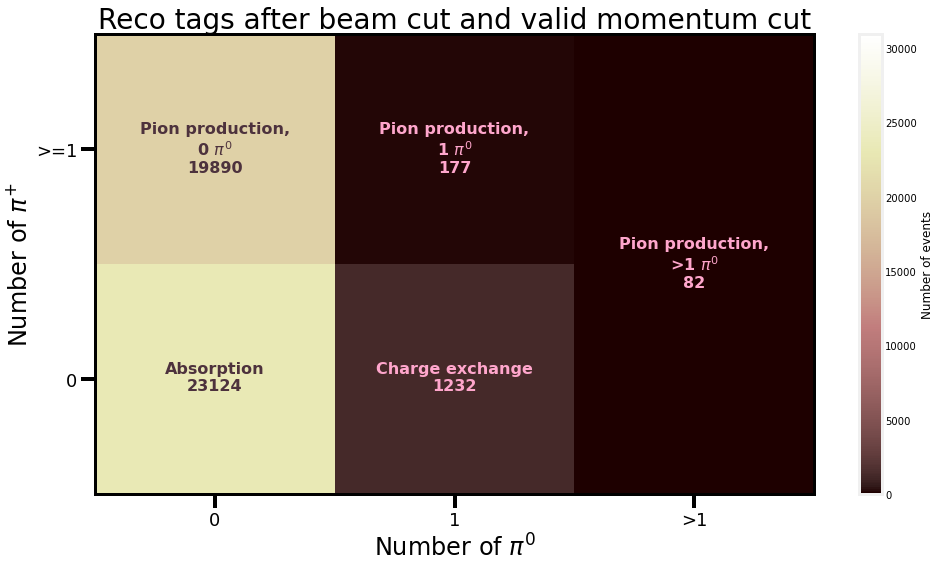

In [9]:
Plots.plot_region_data(
    reco_regions, compare_max=31114,
    title="Reco tags after beam cut and valid momentum cut")

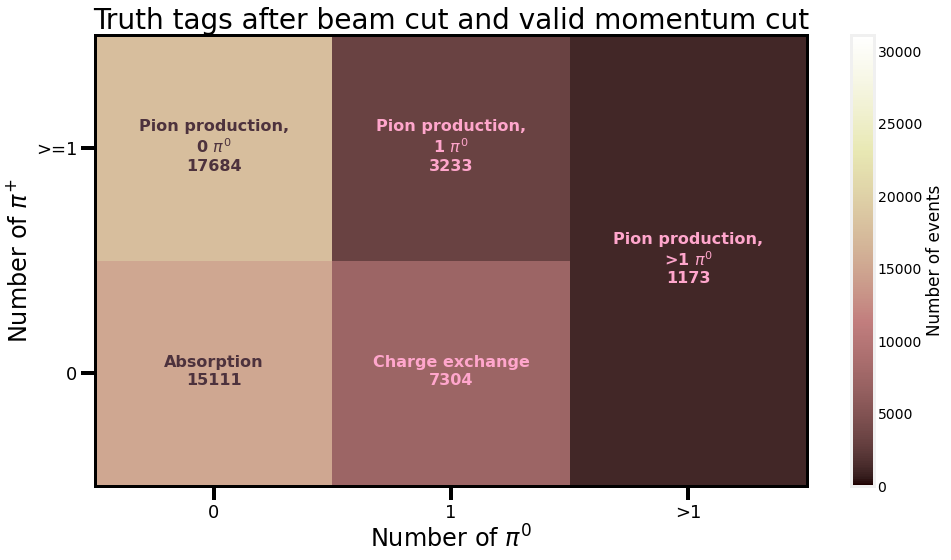

In [16]:
Plots.plot_region_data(
    truth_regions, compare_max=31114,
    title="Truth tags after beam cut and valid momentum cut")

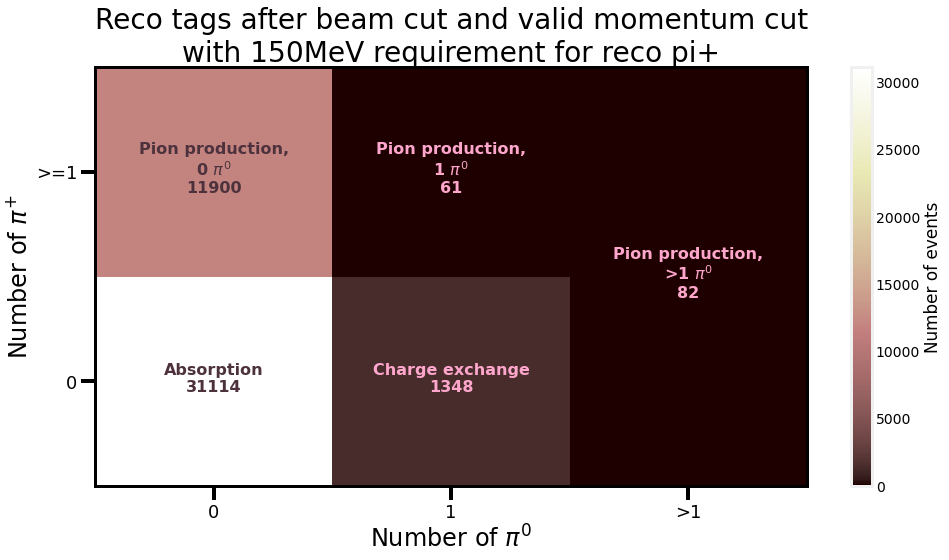

In [17]:
Plots.plot_region_data(
    reco_regions_mom_cut, compare_max=31114,
    title="Reco tags after beam cut and valid momentum cut\nwith 150MeV requirement for reco pi+",
    colourblind=False)

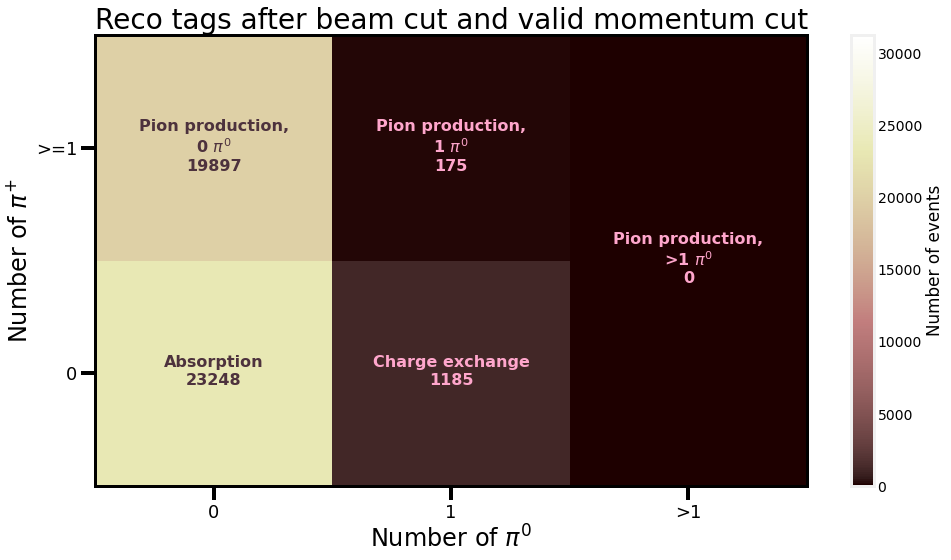

In [20]:
Plots.plot_region_data(
    reco_regions_two, compare_max=31242,
    title="Reco tags after beam cut and valid momentum cut")

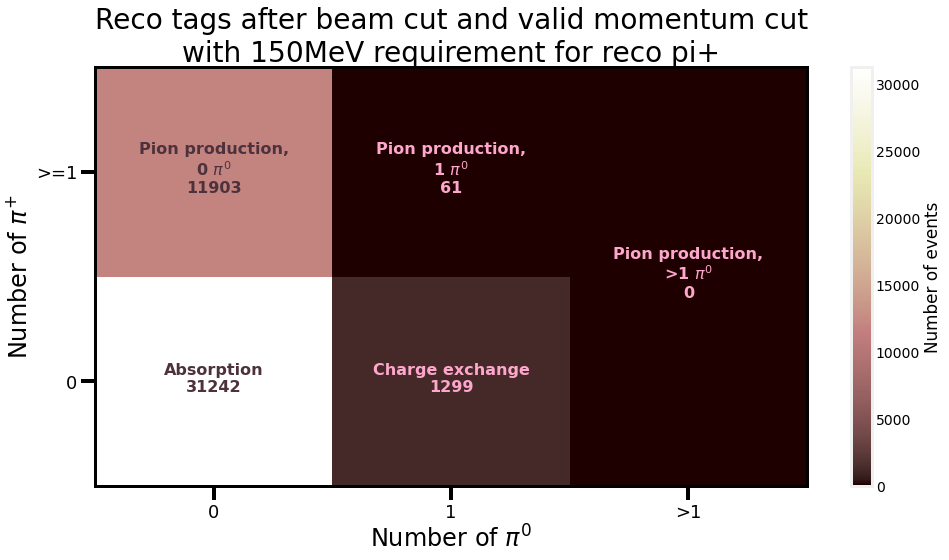

In [18]:
Plots.plot_region_data(
    reco_regions_mom_cut_two, compare_max=31242,
    title="Reco tags after beam cut and valid momentum cut\nwith 150MeV requirement for reco pi+",
    colourblind=False)

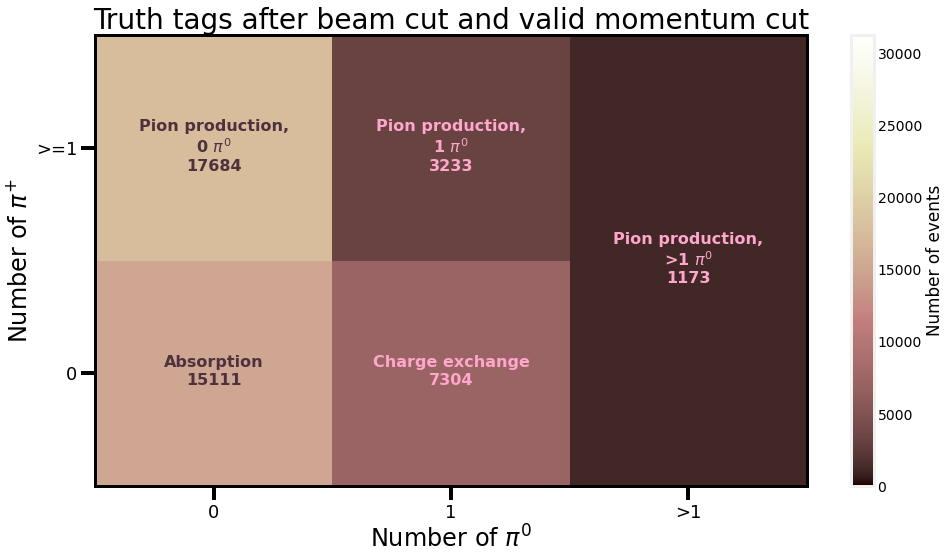

In [19]:
Plots.plot_region_data(
    truth_regions, compare_max=31242,
    title="Truth tags after beam cut and valid momentum cut")

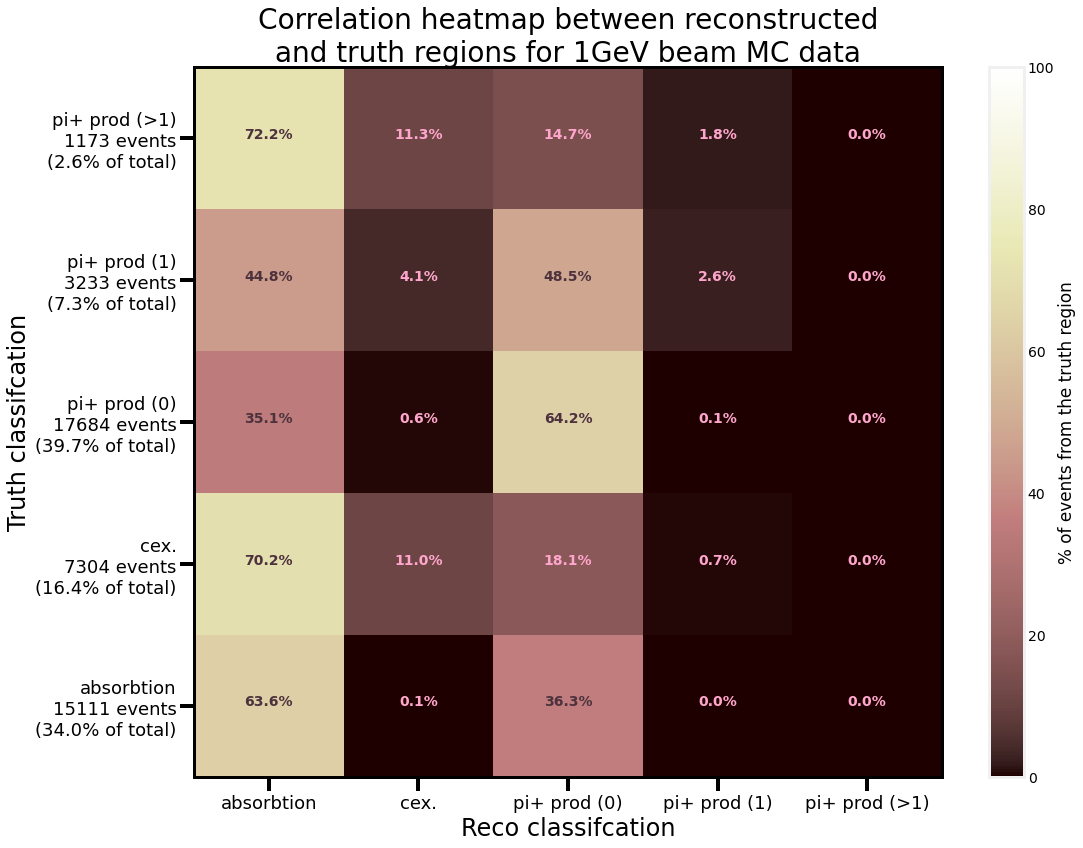

In [21]:
Plots.compare_truth_reco_regions(
    reco_regions_two, truth_regions,
    title="Correlation heatmap between reconstructed\nand truth regions for 1GeV beam MC data")

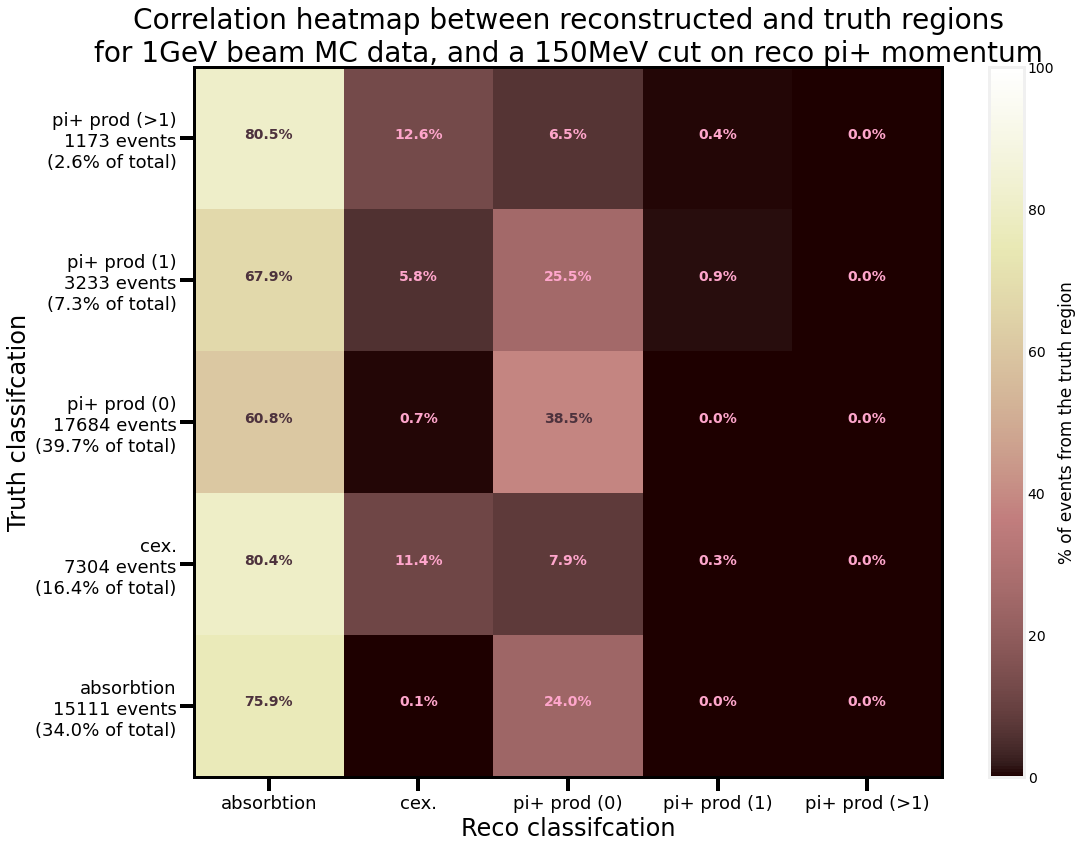

In [24]:
Plots.compare_truth_reco_regions(
    reco_regions_mom_cut_two, truth_regions,
    title="Correlation heatmap between reconstructed and truth regions\nfor 1GeV beam MC data, and a 150MeV cut on reco pi+ momentum")

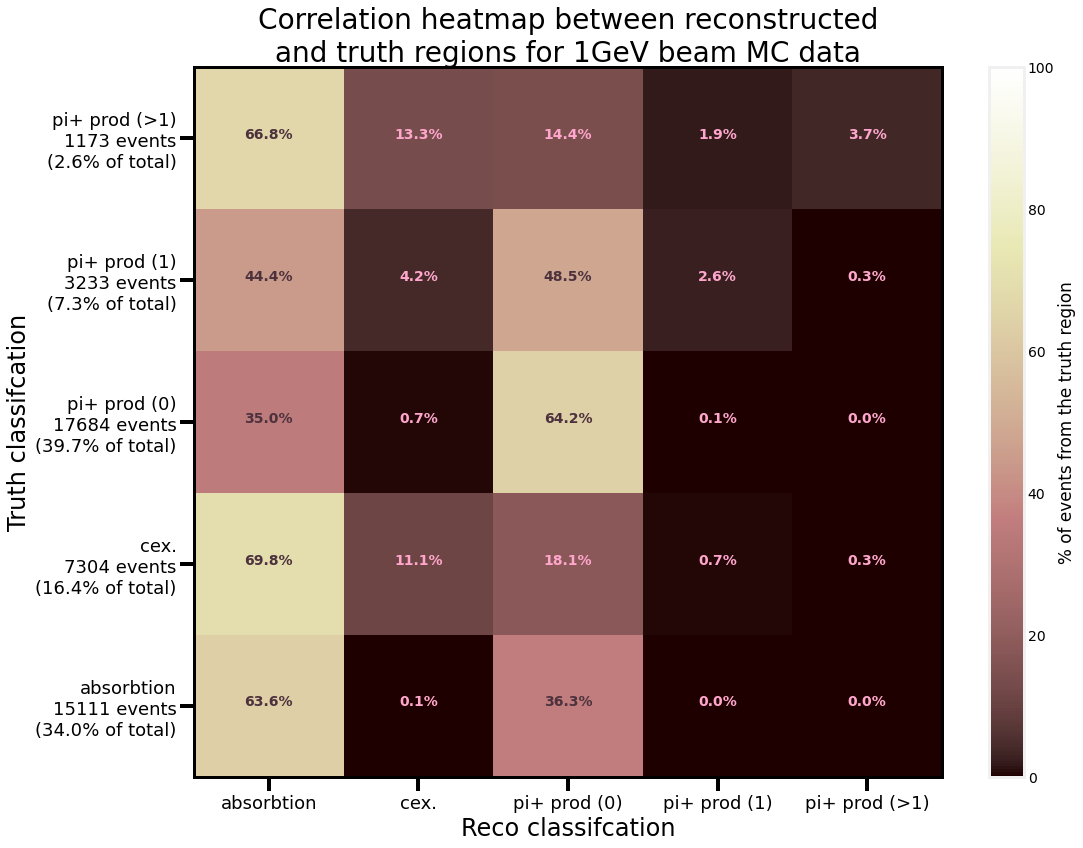

In [12]:
Plots.compare_truth_reco_regions(
    reco_regions, truth_regions,
    title="Correlation heatmap between reconstructed\nand truth regions for 1GeV beam MC data")

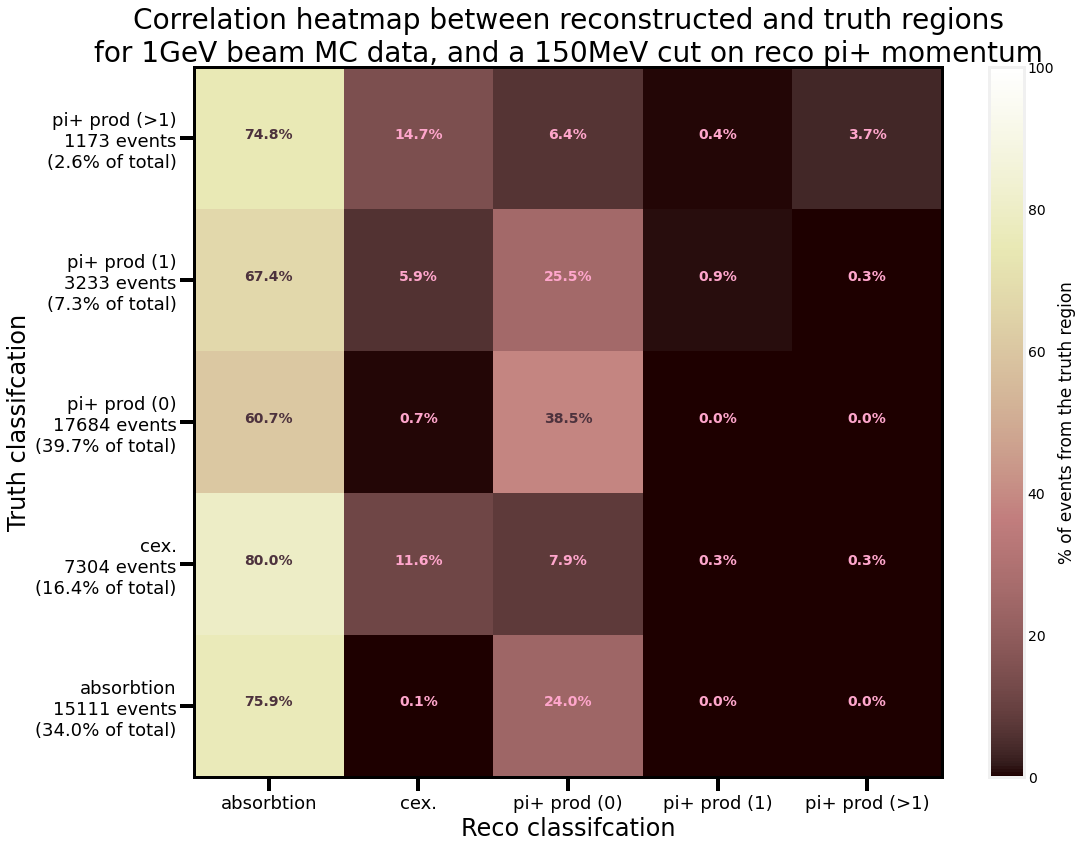

In [13]:
Plots.compare_truth_reco_regions(
    reco_regions_mom_cut, truth_regions,
    title="Correlation heatmap between reconstructed and truth regions\nfor 1GeV beam MC data, and a 150MeV cut on reco pi+ momentum")

In [5]:
beam_numbers = evts.io.Get("true_beam_ID")
gen1_numbers = evts.io.Get("true_beam_daughter_ID")
gen2_numbers = evts.io.Get("true_beam_Pi0_decay_ID")

In [9]:
gen1_numbers

<Array [[621164, 621165, ... 675708, 675709]] type='1000 * var * int32'>

In [6]:
beam_numbers_shaped = ak.unflatten(beam_numbers, 1, -1)

In [7]:
numbers_comb = ak.concatenate([beam_numbers_shaped, gen1_numbers, gen2_numbers], -1)

In [4]:
nums_one_step = ak.concatenate([ak.unflatten(evts.io.Get("true_beam_ID"), 1, -1), evts.io.Get("true_beam_daughter_ID"), evts.io.Get("true_beam_Pi0_decay_ID")], -1)

In [5]:
setattr(evts.trueParticles, f"_{type(evts.trueParticles).__name__}__number", nums_one_step)

In [5]:
getattr(evts.trueParticles, f"_{type(evts.trueParticles).__name__}__number")

<Array [[1, 621164, ... 638127, 638128]] type='298194 * var * int32'>

In [11]:
evts.trueParticles.filters

[<Array [True, True, False, ... False, True] type='1000 * bool'>,
 <Array [True, True, True, ... True, True] type='264 * bool'>]

In [7]:
evts.trueParticles.FilterVariable(f"_{type(evts.trueParticles).__name__}__number")

In [4]:
evts.trueParticles.number

Running PDSPData...

Setting attribute

Filtering

FilterVariable started

Before setattr in FilterVariable

Running PDSPData...

Except in FilterVariable

Warning done from FilterVariable

Before setattr in FilterVariable

Running PDSPData...

Except in FilterVariable

Warning done from FilterVariable

<Array [[1, 621164, ... 675895, 675896]] type='1000 * var * int32'>

In [8]:
getattr(evts.trueParticles, "number")

Running PDSPData...

<Array [[1, 621164, ... 638127, 638128]] type='298194 * var * int32'>

In [9]:
type(evts.trueParticles).__name__

'TrueParticleData'

In [4]:
evts.trueParticles.number

Running PDSPData...

Running PDSPData...

Running PDSPData...

<Array [[1, 621164, ... 638127, 638128]] type='298194 * var * int32'>

In [6]:
evts.trueParticles.PDSPData("numberTest", "true_beam_ID", "true_beam_daughter_ID", "true_beam_Pi0_decay_ID")

Running PDSPData...

In [12]:
delattr(evts.trueParticles, f"_{type(evts.trueParticles).__name__}__number")

In [46]:
evts.trueParticles.pdg

Property call

End of if

Done propertry run

<Array [[211, -211, 211, ... 22, 1000060110]] type='298194 * var * int32'>

In [47]:
beam_pi0s = evts.trueParticles.number[np.logical_and(
        evts.trueParticles.mother == 1,
        evts.trueParticles.pdg == 111)]

Property call

End of if

Done propertry run

In [51]:
np.unique(ak.count(beam_pi0s, axis=-1), return_index=True)

(array([0, 1, 2, 3, 4]), array([     0,      7,    103,    302, 110613]))

In [52]:
beam_pi0s[103]

<Array [840931, 840934] type='2 * int32'>

In [56]:
print(evts.trueParticles.mother_pdg)

None


In [12]:
numbers_filtered = numbers_comb[evts.trueParticles.filters[0]][evts.trueParticles.filters[1]]

In [4]:
mother_ids = evts.trueParticles.mother

In [13]:
truth_ids = evts.trueParticles.number

In [60]:
evts.trueParticles.direction

<Array [[{x: -0.2, y: -0.191, ... z: -0.684}]] type='298194 * var * {"x": float6...'>

In [12]:
mother_pdgs = PFOSelection.get_mother_pdgs(evts)

In [6]:
def get_two_count_pi0s(pi0s):
    pions, counts = np.unique(pi0s, return_counts=True)
    return pions[counts == 2]

In [8]:
beam_daughter_filter = evts.trueParticles.mother == 1

In [ ]:
beam_cadidate_pi0s = evts.trueParticles.number[np.logical_and(
    beam_daughter_filter,
    evts.trueParticles.pdg == 111)]

In [ ]:
pi0_daughters = evts.trueParticles.mother_pdg == 111

In [ ]:
pi0_photon_mothers = evts.trueParticles.mother[np.logical_and(
    evts.trueParticles.pdg == 22,
    pi0_daughters)]

In [ ]:
counts = ak.Array(map(
    lambda pi0s: len(
        np.intersect1d(
            pi0s['beam'],
            get_two_count_pi0s(pi0s['photon']))),
    ak.zip(
        {"beam": beam_cadidate_pi0s[:100], "photon": pi0_photon_mothers[:100]},
        depth_limit=1)))

In [5]:
truth_pi0_counts = EventSelection.count_diphoton_decays(evts)

Property call

Property call

End of if

Done propertry run

Property call

End of if

Done propertry run

End of if

Done propertry run

Property call

End of if

Done propertry run

In [6]:
truth_pi_plus_counts = EventSelection.count_non_beam_charged_pi(evts)

Property call

End of if

Done propertry run

In [11]:
truth_pi0_counts

<Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0] type='298194 * int64'>

In [13]:
reco_pi0_counts

<Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0] type='44273 * int64'>

In [14]:
evts.trueParticlesBT.filters

[<Array [True, True, False, ... False, False] type='298194 * bool'>,
 <Array [[True, True], [True, ... True], [True]] type='76884 * var * bool'>,
 <Array [True, True, True, ... True, False] type='76884 * bool'>]

In [15]:
evts.trueParticles.filters

[<Array [True, True, False, ... False, False] type='298194 * bool'>,
 <Array [True, True, True, ... True, False] type='76884 * bool'>]

In [16]:
truth_pi0_filtered = truth_pi0_counts[evts.trueParticles.filters[0]]
truth_pi0_filtered = truth_pi0_filtered[evts.trueParticles.filters[1]]
truth_pi_plus_filtered = truth_pi_plus_counts[evts.trueParticles.filters[0]]
truth_pi_plus_filtered = truth_pi_plus_filtered[evts.trueParticles.filters[1]]

In [21]:
np.unique(truth_pi0_counts)

<Array [0] type='1 * int64'>

/tmp/ipykernel_874188/4030208874.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(reco_pi0_counts, truth_pi0_counts, cmin=1, bins=np.array([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_874188/4030208874.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


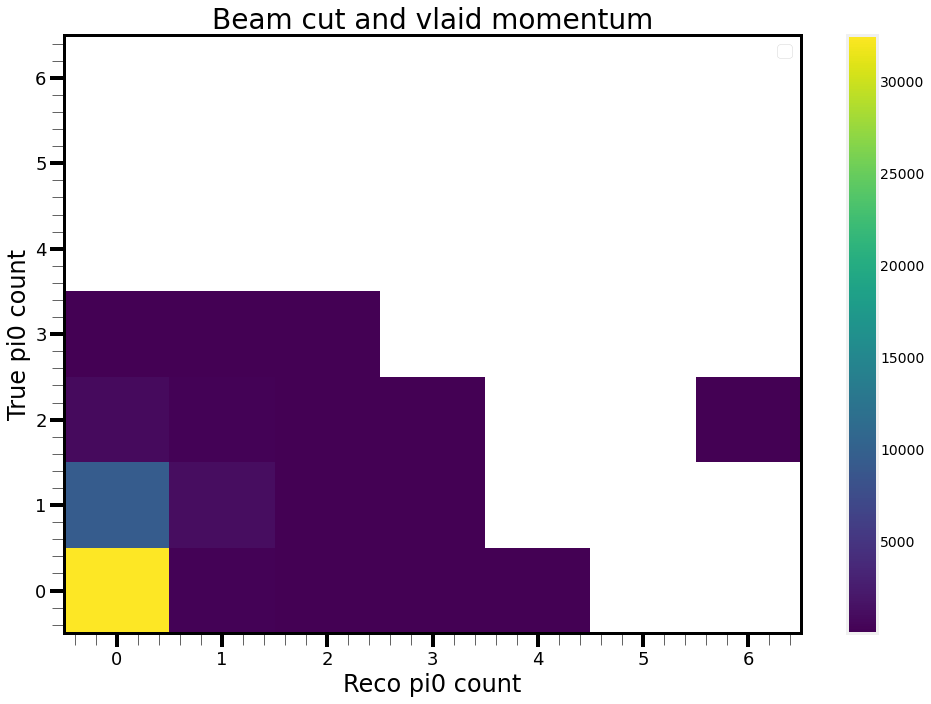

In [6]:
plt_conf.setup_figure(title="Beam cut and vlaid momentum")
plt.hist2d(reco_pi0_counts, truth_pi0_counts, cmin=1, bins=np.array([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]))
plt_conf.format_axis(xlabel = "Reco pi0 count", ylabel = "True pi0 count")
plt.colorbar()
plt_conf.end_plot()

/tmp/ipykernel_874188/3846048580.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(reco_pi_plus_counts, truth_pi_plus_counts, cmin=1, bins=np.array([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_874188/3846048580.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


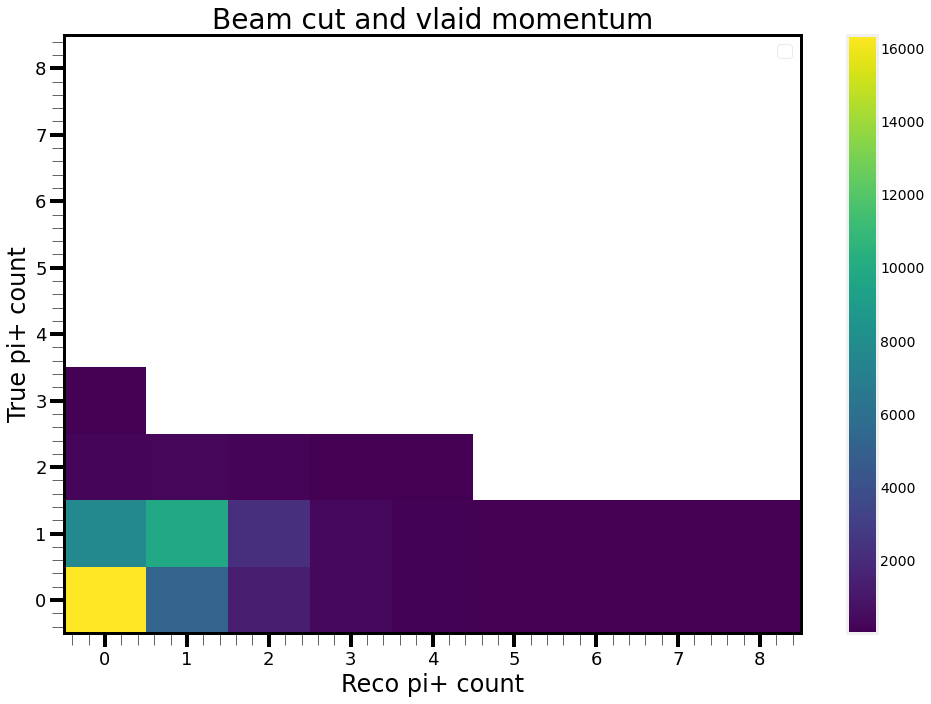

In [7]:
plt_conf.setup_figure(title="Beam cut and vlaid momentum")
plt.hist2d(reco_pi_plus_counts, truth_pi_plus_counts, cmin=1, bins=np.array([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]))
plt_conf.format_axis(xlabel = "Reco pi+ count", ylabel = "True pi+ count")
plt.colorbar()
plt_conf.end_plot()

In [25]:
np.unique(ak.sum(full_pass5,axis=1), return_counts=True)

(array([0, 1, 2, 3, 6]), array([5927,  125,   10,    3,    2]))

In [21]:
photon_selected_evts = evts.Filter([photons_mask], returnCopy=True)
pairs = Master.ShowerPairs(photon_selected_evts)

pass_angle = np.logical_and(
    pairs.reco_angle > np.pi*1/18,
    pairs.reco_angle < np.pi*4/9)
pass_mass = np.logical_and(
    pairs.reco_mass > 50,
    pairs.reco_mass < 250)

/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:165: UserWarning: nTuple type is not specified, assuming it is shower_merging
  warnings.warn(f"nTuple type is not specified, assuming it is {Ntuple_Type.SHOWER_MERGING}")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoParticleData__beam_pandora_tag.
  warnings.warn(f"Couldn't apply filters to {var}.")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:56: UserWarning: Couldn't apply filters to _RecoPart

In [22]:
final_passing = np.logical_and(pass_mass, pass_angle)

In [27]:
np.unique(ak.num(pass_mass), return_counts=True, return_index=True)

(array([ 0,  1,  3,  6, 10]),
 array([   0,   58,  373,  640, 2206]),
 array([5857,  187,   19,    3,    1]))

In [29]:
print(pass_mass[58])
print(pass_angle[58])

[True]
[False]


In [31]:
pairs.reco_angle[58]

<Array [1.06] type='1 * float64'>

In [28]:
np.unique(ak.num(pass_angle), return_counts=True, return_index=True)

(array([ 0,  1,  3,  6, 10]),
 array([   0,   58,  373,  640, 2206]),
 array([5857,  187,   19,    3,    1]))

In [13]:
ak.any(photons_mask)

True

In [40]:
ak.any(final_passing, axis=1)

140

In [37]:
ak.sum(final_passing)

166

In [38]:
res = select_reco_pi0_events(evts, photons_mask)

In [39]:
ak.sum(res)

1

In [64]:
photon_pairs_ind = ak.combinations(inv_photon_mask, 2)

In [65]:
photon_pairs_ind[58]

<Array [([72], [103])] type='1 * (var * int64, var * int64)'>

In [71]:
ak.all(ak.num(evts.recoParticles.number) == ak.num(photons_mask))

True

In [76]:
ak.all(ak.num(photons_mask) == ak.num(evts.trueParticlesBT.energy))

True

In [74]:
ak.all(photon_pairs_ind['1'] <= ak.num(photons_mask))

True

In [102]:
photons_mask[58]

<Array [False, False, False, ... False, False] type='314 * bool'>

In [104]:
inv_photon_mask

<Array [[], [], [], [], ... [], [], [], []] type='6067 * union[var * int64, int64]'>

In [108]:
photon_pairs_ind = ak.combinations(inv_photon_mask, 2)
pairs4 = Master.ShowerPairs(evts, pair_coords=photon_pairs_ind)

pass_angle4 = np.logical_and(
    pairs.reco_angle > 10*np.pi/180,
    pairs.reco_angle < 80*np.pi/180)
pass_mass4 = np.logical_and(
    pairs.reco_mass > 50,
    pairs.reco_mass < 250)

full_pass4 = np.logical_and(pass_angle, pass_mass)

In [80]:
ak.all(ak.num(evts.trueParticlesBT.energy) >= photon_pairs_ind['0'])

True

In [84]:
evts.trueParticlesBT.energy[58]

<Array [5.34e+03, 4.28e+03, ... 4.74e+03] type='314 * float64'>

In [83]:
photon_pairs_ind['0'][58]

<Array [[72]] type='1 * var * int64'>

In [79]:
evts.trueParticlesBT.energy[photon_pairs_ind['0']]

ValueError: in ListArray64, jagged slice inner length differs from array inner length

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/cpu-kernels/awkward_ListArray_getitem_jagged_descend.cpp#L27)

In [78]:
mask_0_leading = (
    evts.trueParticlesBT.energy[photon_pairs_ind['0']]
    >=evts.trueParticlesBT.energy[photon_pairs_ind['1']])

ValueError: in ListArray64, jagged slice inner length differs from array inner length

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/cpu-kernels/awkward_ListArray_getitem_jagged_descend.cpp#L27)

In [20]:
pairs5 = Master.ShowerPairs(evts, pair_coords=get_pairs_from_mask(photons_mask))

pass_angle5 = np.logical_and(
    pairs5.reco_angle > 10*np.pi/180,
    pairs5.reco_angle < 80*np.pi/180)
pass_mass5 = np.logical_and(
    pairs5.reco_mass > 50,
    pairs5.reco_mass < 250)

full_pass5 = np.logical_and(pass_angle5, pass_mass5)

In [86]:
photon_pair_coords['0']

<Array [[], [], [], [], ... [], [], [], []] type='6067 * var * int64'>

In [47]:
photon_pair_coords = ak.argcombinations(
    evts.recoParticles.number[photons_mask], 2)
pairs2 = Master.ShowerPairs(evts, pair_coords=photon_pair_coords)

pass_angle2 = np.logical_and(
    pairs.reco_angle > 10*np.pi/180,
    pairs.reco_angle < 80*np.pi/180)
pass_mass2 = np.logical_and(
    pairs.reco_mass > 50,
    pairs.reco_mass < 250)

full_pass2 = np.logical_and(pass_angle, pass_mass)

In [53]:
pairs3 = Master.ShowerPairs(evts, shower_pair_mask=photons_mask)

pass_angle3 = np.logical_and(
    pairs.reco_angle > 10*np.pi/180,
    pairs.reco_angle < 80*np.pi/180)
pass_mass3 = np.logical_and(
    pairs.reco_mass > 50,
    pairs.reco_mass < 250)

full_pass3 = np.logical_and(pass_angle, pass_mass)

/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:1850: UserWarning: 
Shower pair mask has some pairs with 1 photon.
This happens when both shower PFOs in a pair backtrack to the same true photon.
  warnings.warn("\nShower pair mask has some pairs with 1 photon.\nThis happens when both shower PFOs in a pair backtrack to the same true photon.")


In [2]:
print(np.unique(ak.ravel(pairs.reco_mass)))
print(np.unique(ak.ravel(pairs2.reco_mass)))
print(np.unique(ak.ravel(pairs3.reco_mass)))
print(np.unique(ak.ravel(pairs4.reco_mass)))
print(np.unique(ak.ravel(pairs5.reco_mass)))

NameError: name 'np' is not defined

In [51]:
np.unique(ak.ravel(pairs2.reco_mass))

<Array [0, 25.4, 35.8, ... 4e+03, 6.79e+03] type='271 * float64'>

In [52]:
print(np.unique(ak.ravel(pairs.reco_angle)))
print(np.unique(ak.ravel(pairs2.reco_angle)))

[0.0456, 0.0805, 0.0818, 0.0821, 0.0915, 0.0923, ... 2.94, 2.97, 2.99, 3.12, 3.14]
[0.0212, 0.0269, 0.0476, 0.051, 0.052, 0.0566, ... 2.3, 2.33, 2.35, 2.36, 2.38, 2.42]


In [ ]:
print(photons_mask)
print(ak.argcombinations(photon_selected_evts.recoParticles.number, 2))
print(ak.argcombinations(evts.recoParticles.number, 2))

In [9]:
indices = ak.local_index(photons_mask)
print(indices)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ... 229, 230, 231, 232, 233, 234, 235, 236, 237]]


In [10]:
pair_ind = indices[photons_mask]
print(pair_ind)

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]


In [11]:
sorted_pair_ind = ak.argsort(
            evts.trueParticlesBT.energy[photons_mask], ascending=False)
print(sorted_pair_ind)

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]


In [12]:
sorted_pair_ind = pair_ind[sorted_pair_ind]
print(sorted_pair_ind)

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]


In [13]:
true_photon_count = ak.num(sorted_pair_ind)
print(true_photon_count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
indices == sorted_pair_ind[:, 0]

ValueError: in ListOffsetArray64 attempting to get 0, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/cpu-kernels/awkward_NumpyArray_getitem_next_at.cpp#L21)

In [ ]:
def get_two_count_pi0s(pi0s):
    pions, counts = np.unique(pi0s, return_counts=True)
    return pions[counts == 2]

beam_cadidate_pi0s = events.trueParticles.number[np.logical_and(
    events.trueParticles.mother == 1,
    events.trueParticles.pdg == 111)]

pi0_daughters = events.trueParticles.mother_pdg == 111
pi0_photon_mothers = events.trueParticles.mother[np.logical_and(
    events.trueParticles.pdg == 22,
    pi0_daughters)]
counts = ak.Array(map(
    lambda pi0s: len(
        np.intersect1d(
            pi0s['beam'],
            get_two_count_pi0s(pi0s['photon']))),
    ak.zip(
        {"beam": beam_cadidate_pi0s, "photon": pi0_photon_mothers},
        depth_limit=1)))

In [9]:
def get_counts(events):
    def get_two_count_pi0s(pi0s):
        pions, counts = np.unique(pi0s, return_counts=True)
        return pions[counts == 2]
    
    beam_pi0s = np.logical_and(
        events.trueParticles.mother == 1,
        events.trueParticles.pdg == 111)
    pi0_numbers = events.trueParticles.number[beam_pi0s]

    pi0_daughters = events.trueParticles.mother_pdg == 111
    pi0_photon_mothers = events.trueParticles.mother[np.logical_and(
        events.trueParticles.pdg == 22,
        pi0_daughters)]

    reco_photon_mothers = events.trueParticlesBT.mother[events.trueParticlesBT.pdg == 22]

    def get_counts(zipped):
        return [sum(zipped['photon'] == pi) for pi in np.intersect1d(
            zipped['pi0'],
            get_two_count_pi0s(zipped['diphoton']))]

    return ak.Array(map(
        get_counts,
        ak.zip(
            {"pi0": pi0_numbers, "diphoton": pi0_photon_mothers, "photon": reco_photon_mothers},
            depth_limit=1)))

In [10]:
counts = get_counts(evts)

In [20]:
counts2 = get_counts(evts2)

In [22]:
np.unique(ak.ravel(counts2), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 20, 21, 25, 26, 27, 29, 32]),
 array([ 14,  54, 102,  83,  94,  53,  38,  44,  33,  22,  20,  20,  16,
          7,   7,   7,   6,   9,   2,   1,   2,   1,   1,   1,   1]))

In [21]:
np.unique(ak.num(counts2), return_counts=True)

(array([0, 1, 2]), array([2442,  548,   45]))

In [12]:
np.unique(ak.num(counts), return_counts=True)

(array([0, 1, 2]), array([2442,  548,   45]))

In [17]:
np.unique(ak.ravel(counts), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 19,
        22]),
 array([ 30, 148, 167, 105,  57,  39,  32,  13,  13,  11,   8,   4,   3,
          3,   1,   2,   1,   1]))

In [25]:
print(ak.count(counts))
# print(ak.count(counts2))

638
638


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


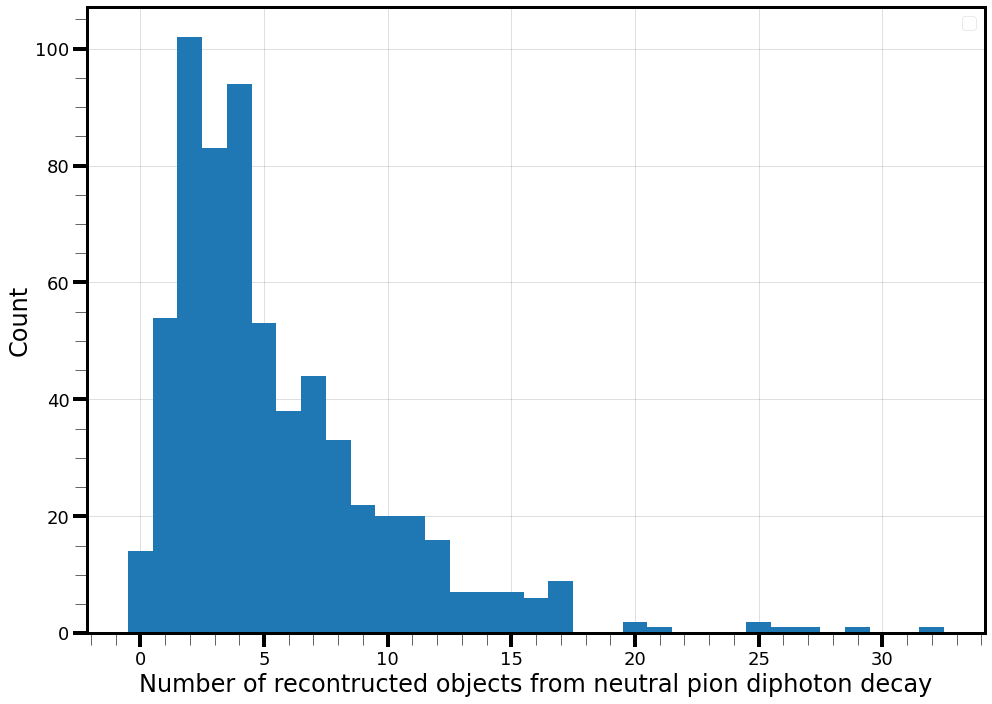

In [23]:
cnts2 = ak.ravel(counts2)
plt_conf.setup_figure()
plt.hist(cnts2, **plt_conf.gen_kwargs(type="hist", histtype="bar", index=0, bins=max(cnts2)+1, range=(-0.5, max(cnts2)+0.5)))
plt_conf.format_axis(xlabel="Number of recontructed objects from neutral pion diphoton decay", ylabel="Count")
plt_conf.end_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


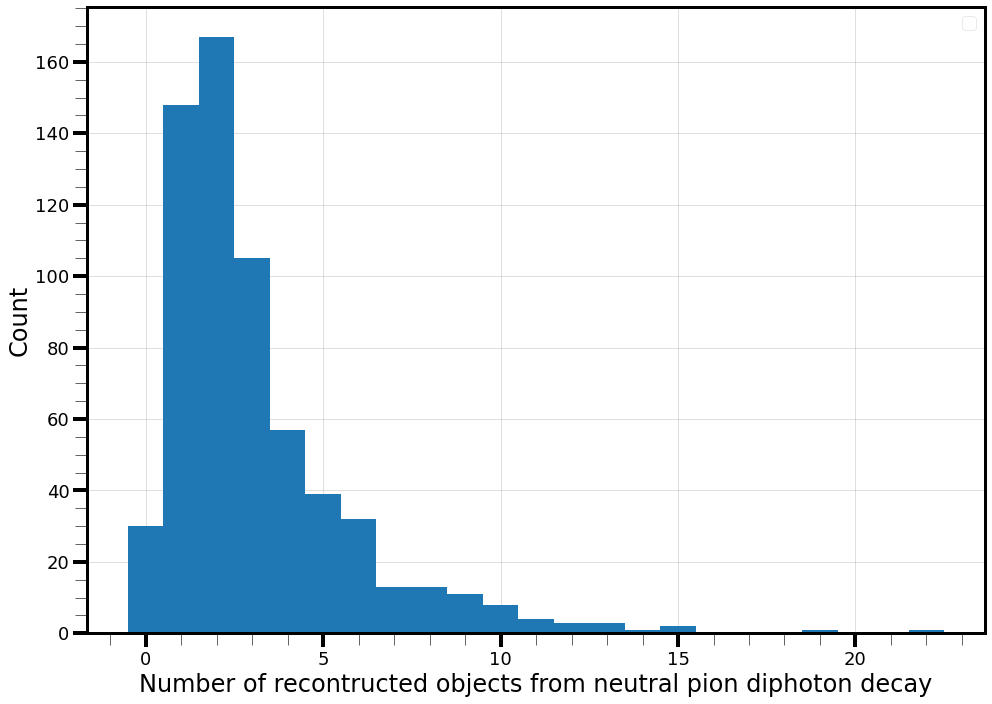

In [16]:
cnts = ak.ravel(counts)
plt_conf.setup_figure()
plt.hist(cnts, **plt_conf.gen_kwargs(type="hist", histtype="bar", index=0, bins=max(cnts)+1, range=(-0.5, max(cnts)+0.5)))
plt_conf.format_axis(xlabel="Number of recontructed objects from neutral pion diphoton decay", ylabel="Count")
plt_conf.end_plot()

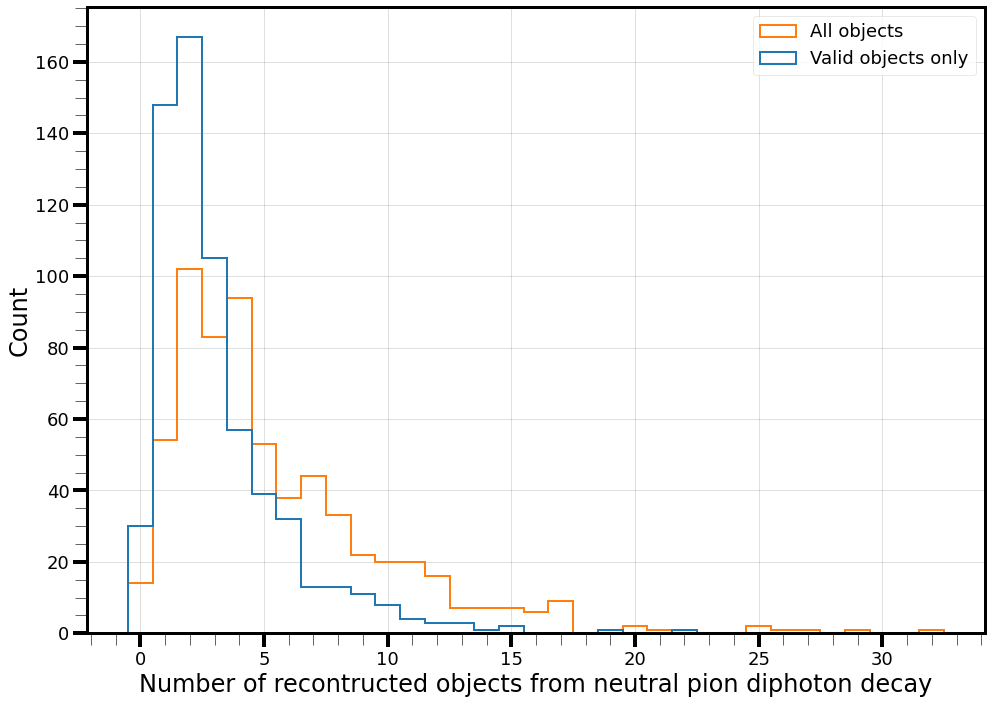

In [24]:
plt_conf.setup_figure()
plt.hist(cnts2, **plt_conf.gen_kwargs(label="All objects", type="hist", index=1, bins=max(cnts2)+1, range=(-0.5, max(cnts2)+0.5)))
plt.hist(cnts, **plt_conf.gen_kwargs(label="Valid objects only", type="hist", index=0, bins=max(cnts)+1, range=(-0.5, max(cnts)+0.5)))
plt_conf.format_axis(xlabel="Number of recontructed objects from neutral pion diphoton decay", ylabel="Count")
plt_conf.end_plot()

In [28]:
np.unique(ak.num(counts), return_counts=True)

(array([0, 1, 2]), array([2430,  560,   45]))

In [ ]:
def get_two_count_pi0s(pi0s):
        pions, counts = np.unique(pi0s, return_counts=True)
        return pions[counts == 2]

    if beam_daughters:
        beam_daughter_filter = events.trueParticles.mother == 1
    else:
        beam_daughter_filter = True
    beam_cadidate_pi0s = events.trueParticles.number[np.logical_and(
        beam_daughter_filter,
        events.trueParticles.pdg == 111)]
    try:
        pi0_daughters = events.trueParticles.mother_pdg == 111
    except:
        pi0_daughters = get_mother_pdgs(events) == 111
    pi0_photon_mothers = events.trueParticles.mother[np.logical_and(
        events.trueParticles.pdg == 22,
        pi0_daughters)]
    counts = ak.Array(map(
        lambda pi0s: len(
            np.intersect1d(
                pi0s['beam'],
                get_two_count_pi0s(pi0s['photon']))),
        ak.zip(
            {"beam": beam_cadidate_pi0s, "photon": pi0_photon_mothers},
            depth_limit=1)))

In [33]:
def get_electrons(pi0s):
    pions, counts = np.unique(pi0s, return_counts=True)
    return pions[counts >=1]

beam_daughter_filter = evts.trueParticles.mother == 1
beam_cadidate_pi0s = evts.trueParticles.number[np.logical_and(
    beam_daughter_filter,
    evts.trueParticles.pdg == 111)]
pi0_daughters = evts.trueParticles.mother_pdg == 111
pi0_photon_mothers = evts.trueParticles.mother[np.logical_and(
    evts.trueParticles.pdg == 11,
    pi0_daughters)]
dalitz_counts = ak.Array(map(
    lambda pi0s: len(
        np.intersect1d(
            pi0s['beam'],
            get_electrons(pi0s['photon']))),
    ak.zip(
        {"beam": beam_cadidate_pi0s, "photon": pi0_photon_mothers},
        depth_limit=1)))

print(ak.sum(dalitz_counts))

12


In [13]:
print(ak.sum(EventSelection.generate_truth_tags(evts, 0, None)))
print(ak.sum(EventSelection.generate_truth_tags(evts, 1, None)))
print(ak.sum(EventSelection.generate_truth_tags(evts, 2, None)))
print(ak.sum(EventSelection.generate_truth_tags(evts, (3,), None)))

2442
548
45
0


In [26]:
zeros_mask = ak.Array(map(lambda x: 0 in x, counts2))

In [35]:
for i, this_event in enumerate(evts.trueParticles.pdg[zeros_mask]):
    print(this_event[evts.trueParticles.mother[zeros_mask][i] == 1])

[111, 11, 11, 11, 11, 11, 11, 11, ... 2112, 211, 111, 22, 22, 2112, 1000180380, 211]
[111, 11, 11, 11, 11, 11, 11, ... 22, 2112, 1000010020, 1000020040, 1000130280, 211]
[111, 11, 11, 11, 11, 11, 11, 11, ... 11, 11, 11, 2212, 111, 22, 2112, 1000180380]
[111, 111, 11, 11, 11, 11, 11, ... 2112, 22, 22, 1000010020, 1000020040, 1000140280]
[111, 111, 11, 11, 11, 11, 11, 11, ... 111, 2212, 22, 2112, 2112, 22, 22, 1000160340]
[111, 11, 11, 11, 11, 11, 11, ... 2212, 22, 2112, 22, 1000020040, 1000140300, 211]
[111, 11, 11, 11, 11, 11, 11, 11, ... 2212, 2112, 2112, 2112, 2112, 22, 1000140290]
[111, 11, 11, 11, 11, 11, 11, ... 2112, 2112, 2112, 22, 22, 1000010020, 1000110230]
[111, 11, 11, 11, 11, 11, 11, 11, ... 22, 2212, 2112, 2212, 2112, 22, 1000140280]
[111, 11, 11, 11, 11, 11, 11, 11, ... 2112, 2112, 2212, 2112, 2112, 2112, 1000140290]
[111, 11, 11, 11, 11, 11, 11, 11, ... 22, 2112, 22, 2112, 22, 1000010020, 1000160320]
[111, 11, 11, 11, 11, 11, 11, ... 2112, 2112, 2112, 22, 1000020030, 100

In [19]:
evts2 = EventSelection.load_and_cut_data(
    "/scratch/wx21978/pi0/root_files/1GeV_beam_v4_prelim/Prod4a_1GeV_BeamSim_00_prelim.root",
    batch_size = -1, batch_start = -1,
    valid_momenta=False,
    cnn_cut=0,#0.5,
    n_hits_cut=0,#80,
    distance_bounds_cm=None,#(3,90),
    max_impact_cm=None,#20,
    beam_slice_cut=False)

number of entries before|after PiBeamSelection: 23660|13430
number of entries before|after PandoraTagCut: 23660|19505
number of entries before|after CaloSizeCut: 23660|19194
number of entries before|after BeamQualityCut: 23660|14415
number of entries before|after APA3Cut: 23660|21409
number of entries before|after MichelScoreCut: 23660|9583
number of entries before|after MedianDEdXCut: 23660|15907
                 number of events which pass the cut  single efficiency  \
no selection                                 23660.0         100.000000   
PiBeamSelection                              13430.0          56.762468   
PandoraTagCut                                19505.0          82.438715   
CaloSizeCut                                  19194.0          81.124260   
BeamQualityCut                               14415.0          60.925613   
APA3Cut                                      21409.0          90.486052   
MichelScoreCut                                9583.0          40.502959   

In [8]:
evts = EventSelection.load_and_cut_data(
    "/scratch/wx21978/pi0/root_files/1GeV_beam_v4_prelim/Prod4a_1GeV_BeamSim_00_prelim.root",
    batch_size = -1, batch_start = -1,
    valid_momenta=True,
    cnn_cut=0,#0.5,
    n_hits_cut=0,#80,
    distance_bounds_cm=None,#(3,90),
    max_impact_cm=None,#20,
    beam_slice_cut=False)

# pair_coords = ak.argcombinations(evts.recoParticles.number, 2)

# sig_count = PairSelection.get_sig_count(evts, pair_coords)
# truth_mask = sig_count == 2
# print("a")

# pairs = Master.ShowerPairs(evts, pair_coords)
# print("b")
# masses = pairs.reco_mass
# momenta = pairs.reco_pi0_mom
# energies = pairs.reco_energy
# approaches = pairs.reco_closest_approach
# separations = pairs.reco_separation
# impacts = PairSelection.paired_beam_impact(pairs)
# angles = pairs.reco_angle

number of entries before|after PiBeamSelection: 23660|13430
number of entries before|after PandoraTagCut: 23660|19505
number of entries before|after CaloSizeCut: 23660|19194
number of entries before|after BeamQualityCut: 23660|14415
number of entries before|after APA3Cut: 23660|21409
number of entries before|after MichelScoreCut: 23660|9583
number of entries before|after MedianDEdXCut: 23660|15907
                 number of events which pass the cut  single efficiency  \
no selection                                 23660.0         100.000000   
PiBeamSelection                              13430.0          56.762468   
PandoraTagCut                                19505.0          82.438715   
CaloSizeCut                                  19194.0          81.124260   
BeamQualityCut                               14415.0          60.925613   
APA3Cut                                      21409.0          90.486052   
MichelScoreCut                                9583.0          40.502959   

In [9]:
tags = {
    "10-0+": EventSelection.generate_truth_tags(evts, 1, 0),
    "X0-0+": EventSelection.generate_truth_tags(evts, (1,), 0),
    "00-0+": EventSelection.generate_truth_tags(evts, 0, 0),
    "00-X+": EventSelection.generate_truth_tags(evts, 0, (1,)),
    "X0-X+": EventSelection.generate_truth_tags(evts, (1,), (1,)),
    "X0-+": EventSelection.generate_truth_tags(evts, (1,), None)}

In [22]:
# print(ak.all(tags["00-0+"] + tags["00-X+"] + tags["X0-+"]))
keys = list(tags.keys())
for i,k in enumerate(keys):
    for k2 in keys[i+1:]:
        print(f"{k}, {k2} Overlapping: {ak.any(tags[k] * tags[k2])}")
        print(f"{k} subset of {k2}: {ak.all((tags[k] * tags[k2])[tags[k]])}")
        print(f"{k2} subset of {k}: {ak.all((tags[k] * tags[k2])[tags[k2]])}")

10-0+, X0-0+ Overlapping: True
10-0+ subset of X0-0+: True
X0-0+ subset of 10-0+: False
10-0+, 00-0+ Overlapping: False
10-0+ subset of 00-0+: False
00-0+ subset of 10-0+: False
10-0+, 00-X+ Overlapping: False
10-0+ subset of 00-X+: False
00-X+ subset of 10-0+: False
10-0+, X0-X+ Overlapping: False
10-0+ subset of X0-X+: False
X0-X+ subset of 10-0+: False
10-0+, X0-+ Overlapping: True
10-0+ subset of X0-+: True
X0-+ subset of 10-0+: False
X0-0+, 00-0+ Overlapping: False
X0-0+ subset of 00-0+: False
00-0+ subset of X0-0+: False
X0-0+, 00-X+ Overlapping: False
X0-0+ subset of 00-X+: False
00-X+ subset of X0-0+: False
X0-0+, X0-X+ Overlapping: False
X0-0+ subset of X0-X+: False
X0-X+ subset of X0-0+: False
X0-0+, X0-+ Overlapping: True
X0-0+ subset of X0-+: True
X0-+ subset of X0-0+: False
00-0+, 00-X+ Overlapping: False
00-0+ subset of 00-X+: False
00-X+ subset of 00-0+: False
00-0+, X0-X+ Overlapping: False
00-0+ subset of X0-X+: False
X0-X+ subset of 00-0+: False
00-0+, X0-+ Overlappin

In [10]:
pairs = Master.ShowerPairs(evts, pair_coords)
print("b")
masses = pairs.reco_mass
momenta = pairs.reco_pi0_mom
energies = pairs.reco_energy
approaches = pairs.reco_closest_approach
separations = pairs.reco_separation
impacts = PairSelection.paired_beam_impact(pairs)
angles = pairs.reco_angle

b


/software/wx21978/miniconda/envs/pi0-phys/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(


In [9]:
selction_filter = PFOSelection.InitialPi0PhotonSelection(evts, verbose=True)
test_evts = evts.Filter([selction_filter], returnCopy=True)
EventSelection.apply_filter(test_evts, Master.NPFPMask(test_evts, -1), truth_filter=True)

number of entries before|after EMScoreCut: 790027|601498
number of entries before|after NHitsCut: 790027|204662
number of entries before|after BeamParticleDistanceCut: 790027|16727
number of entries before|after BeamParticleIPCut: 790027|9298
                         number of events which pass the cut  \
no selection                                        790027.0   
EMScoreCut                                          601498.0   
NHitsCut                                            204662.0   
BeamParticleDistanceCut                              16727.0   
BeamParticleIPCut                                     9298.0   

                         single efficiency  \
no selection                    100.000000   
EMScoreCut                       76.136385   
NHitsCut                         25.905697   
BeamParticleDistanceCut           2.117269   
BeamParticleIPCut                 1.176922   

                         number of events after successive cuts  \
no selection                

/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to _RecoParticleData__beam_number.
  warnings.warn(f"Couldn't apply filters to {var}.")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to _RecoParticleData__beam_caloWire.
  warnings.warn(f"Couldn't apply filters to {var}.")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to _RecoParticleData__beam_startPos.
  warnings.warn(f"Couldn't apply filters to {var}.")
/users/wx21978/projects/pion-phys/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to _RecoParticleData__beam_endPos.
  warnings.warn(f"Coul

Mask created


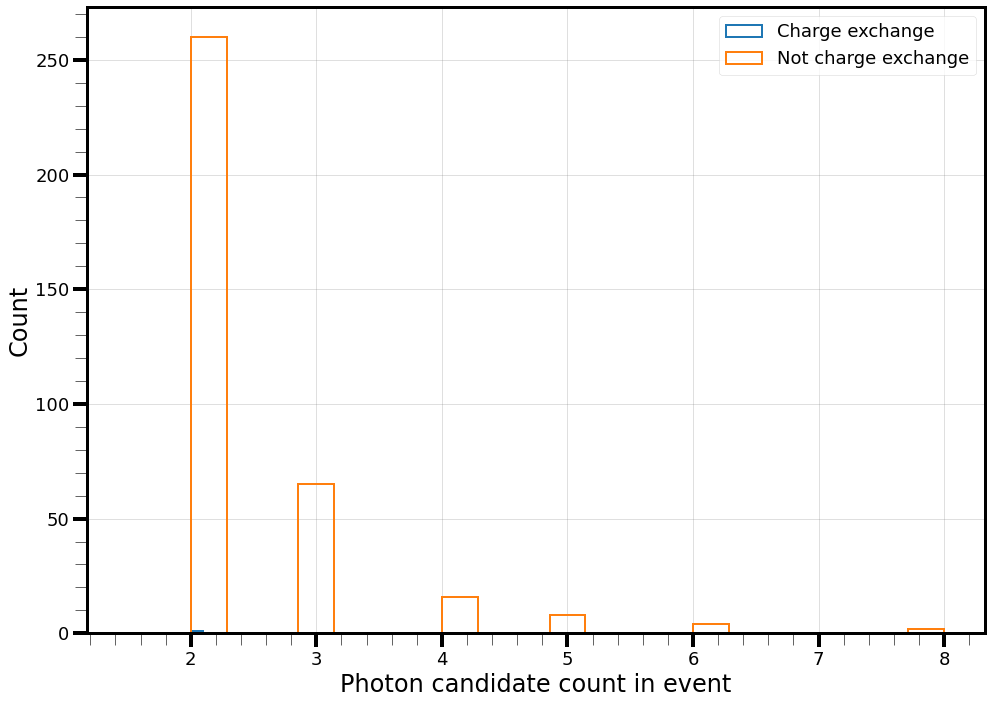

In [ ]:
charge_exchange_mask = EventSelection.generate_truth_tags(evts, 1, 0)
print("Mask created")
cex_counts = ak.count(evts.recoParticles.number[charge_exchange_mask], axis=1)
not_cex_counts = ak.count(evts.recoParticles.number[np.logical_not(charge_exchange_mask)], axis=1)

plt_conf.setup_figure()
plt.hist(cex_counts, **plt_conf.gen_kwargs(type="hist", index=0, label="Charge exchange", bins=plt_conf.get_bins(cex_counts)))
plt.hist(not_cex_counts, **plt_conf.gen_kwargs(type="hist", index=1, label="Not charge exchange", bins=plt_conf.get_bins(not_cex_counts)))
plt_conf.format_axis(xlabel="Photon candidate count in event", ylabel="Count")
plt_conf.end_plot()

In [ ]:
tags = {
    "Charge ex. 1pi0, 0pi+": EventSelection.generate_truth_tags(evts, 1, 0),
    "Charge ex. Xpi0, 0pi+": EventSelection.generate_truth_tags(evts, (1,), 0),
    "Absorbtion 0pi0, 0pi+": EventSelection.generate_truth_tags(evts, 0, 0),
    "Pion production 0pi0, Xpi+": EventSelection.generate_truth_tags(evts, 0, (1,)),
    "Pion production Xpi0, Xpi+": EventSelection.generate_truth_tags(evts, (1,), (1,)),
    "Inclusive pi0 signal Xpi0, 0/Xpi+": EventSelection.generate_truth_tags(evts, (1,), None)}

for label in tags.keys():
    print(f"{ak.sum(tags[label])} events of type: {label}.")



407 events of type: Charge ex. 1pi0, 0pi+.
449 events of type: Charge ex. Xpi0, 0pi+.
1263 events of type: Absorbtion 0pi0, 0pi+.
1179 events of type: Pion production 0pi0, Xpi+.
144 events of type: Pion production Xpi0, Xpi+.
593 events of type: Inclusive pi0 signal Xpi0, 0/Xpi+.


In [13]:
test_evts = evts.Filter([selction_filter], returnCopy=True)
EventSelection.apply_filter(test_evts, np.sort(Master.NPFPMask(test_evts, -1))[::-1], truth_filter=True)

In [14]:
tags = {
    "Charge ex. 1pi0, 0pi+": EventSelection.generate_truth_tags(test_evts, 1, 0),
    "Charge ex. Xpi0, 0pi+": EventSelection.generate_truth_tags(test_evts, (1,), 0),
    "Absorbtion 0pi0, 0pi+": EventSelection.generate_truth_tags(test_evts, 0, 0),
    "Pion production 0pi0, Xpi+": EventSelection.generate_truth_tags(test_evts, 0, (1,)),
    "Pion production Xpi0, Xpi+": EventSelection.generate_truth_tags(test_evts, (1,), (1,)),
    "Inclusive pi0 signal Xpi0, 0/Xpi+": EventSelection.generate_truth_tags(test_evts, (1,), None)}

for label in tags.keys():
    print(f"{ak.sum(tags[label])} events of type: {label}.")

12 events of type: Charge ex. 1pi0, 0pi+.
14 events of type: Charge ex. Xpi0, 0pi+.
57 events of type: Absorbtion 0pi0, 0pi+.
41 events of type: Pion production 0pi0, Xpi+.
6 events of type: Pion production Xpi0, Xpi+.
20 events of type: Inclusive pi0 signal Xpi0, 0/Xpi+.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


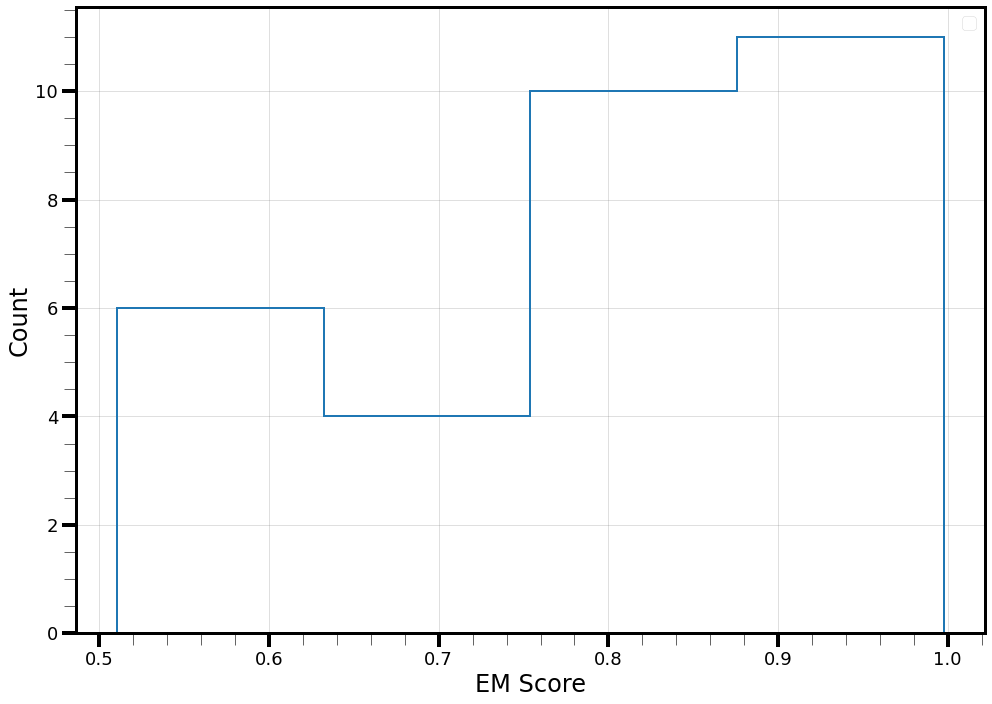

In [16]:
data = ak.ravel(test_evts.recoParticles.emScore)
plt_conf.setup_figure()
plt.hist(data, **plt_conf.gen_kwargs(type="hist", bins=plt_conf.get_bins(data)))
plt_conf.format_axis(xlabel="EM Score", ylabel="Count")
plt_conf.end_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


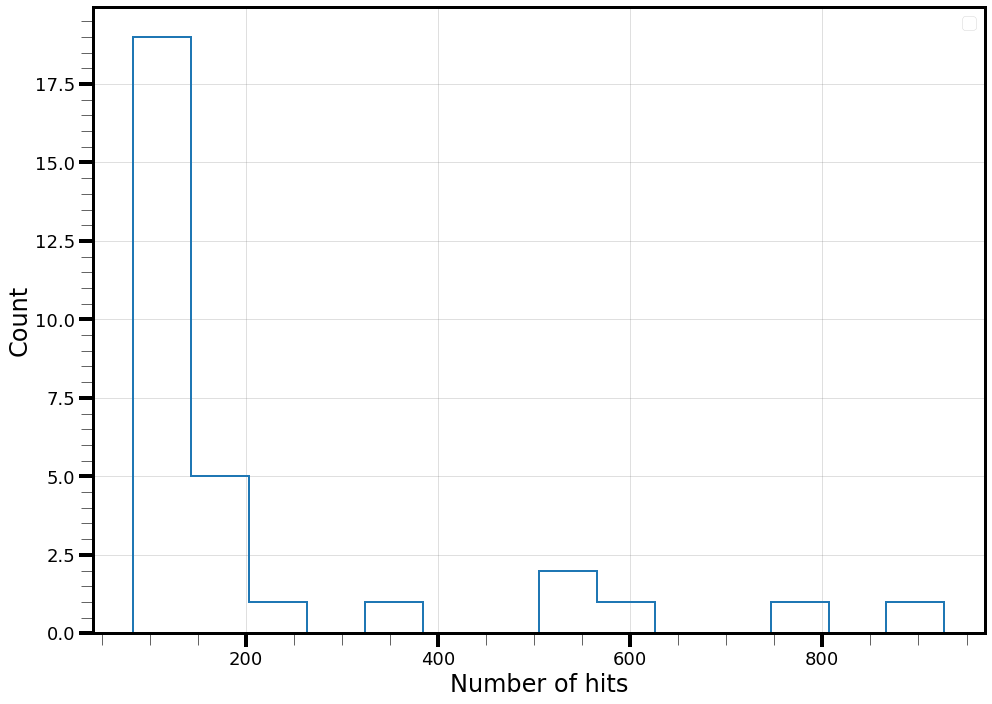

In [17]:
data = ak.ravel(test_evts.recoParticles.nHits)
plt_conf.setup_figure()
plt.hist(data, **plt_conf.gen_kwargs(type="hist", bins=plt_conf.get_bins(data)))
plt_conf.format_axis(xlabel="Number of hits", ylabel="Count")
plt_conf.end_plot()

In [ ]:
tags = {
    "Charge ex. 1pi0, 0pi+": EventSelection.generate_truth_tags(test_evts, 1, 0),
    "Charge ex. Xpi0, 0pi+": EventSelection.generate_truth_tags(test_evts, (1,), 0),
    "Absorbtion 0pi0, 0pi+": EventSelection.generate_truth_tags(test_evts, 0, 0),
    "Pion production 0pi0, Xpi+": EventSelection.generate_truth_tags(test_evts, 0, (1,)),
    "Pion production Xpi0, Xpi+": EventSelection.generate_truth_tags(test_evts, (1,), (1,)),
    "Inclusive pi0 signal Xpi0, 0/Xpi+": EventSelection.generate_truth_tags(test_evts, (1,), None)}

for label in tags.keys():
    print(f"{ak.sum(tags[label])} events of type: {label}.")

12 events of type: Charge ex. 1pi0, 0pi+.
14 events of type: Charge ex. Xpi0, 0pi+.
57 events of type: Absorbtion 0pi0, 0pi+.
41 events of type: Pion production 0pi0, Xpi+.
6 events of type: Pion production Xpi0, Xpi+.
20 events of type: Inclusive pi0 signal Xpi0, 0/Xpi+.


In [ ]:
print(ak.num(evts.eventNum, axis=0))
print(ak.num(test_evts.eventNum, axis=0))

3035
118


In [ ]:
from python.analysis import pfoProperties
num_events = ak.num(evts.recoParticles.beam_number, axis=0)
distance_mask_old = [[]] * num_events
print(num_events)
for i in range(num_events):
    if i%100 == 0:
        print(i)
    starts = evts.recoParticles.startPos[i]
    beam_vertex = evts.recoParticles.beam_endPos[i]
    directions = evts.recoParticles.direction[i]
    distance_mask_old[i] = pfoProperties.get_impact_parameter(
                directions,
                starts,
                beam_vertex) < 20
distance_mask_old = ak.Array(distance_mask_old)

distances_new = pfoProperties.get_impact_parameter(evts.recoParticles.direction, evts.recoParticles.startPos, evts.recoParticles.beam_endPos)

23633
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18

/software/wx21978/miniconda/envs/pi0-phys/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


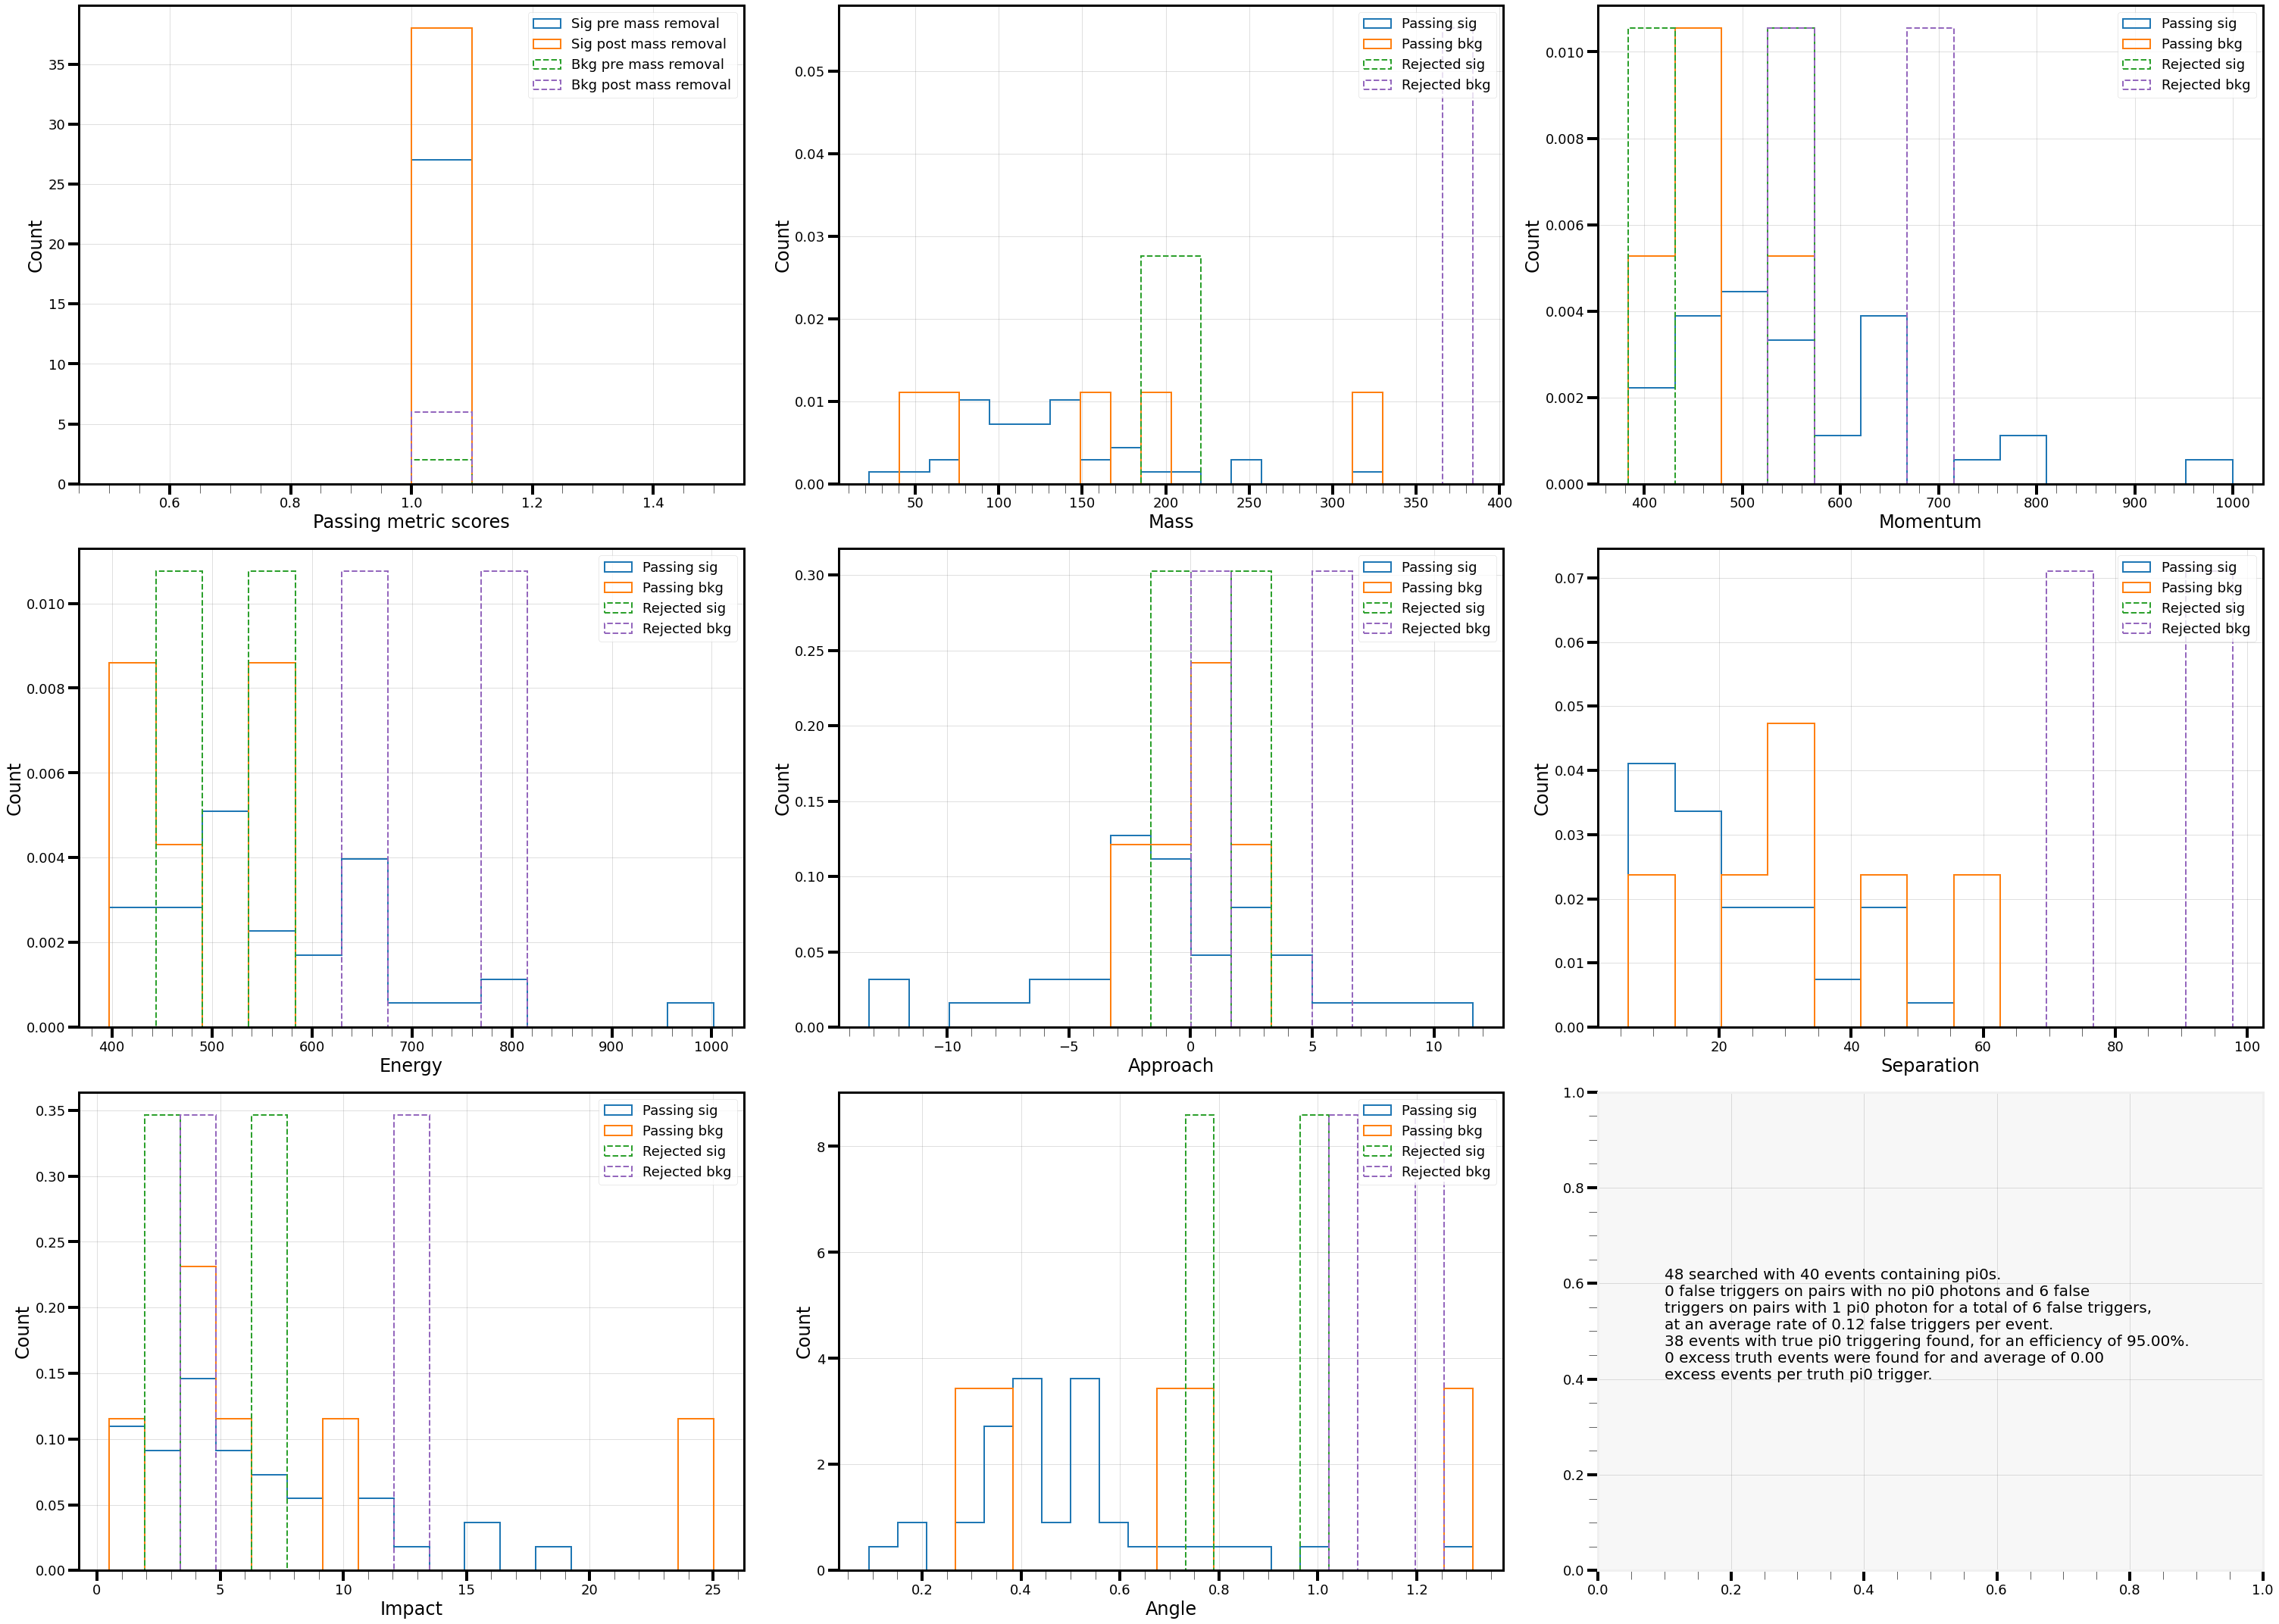

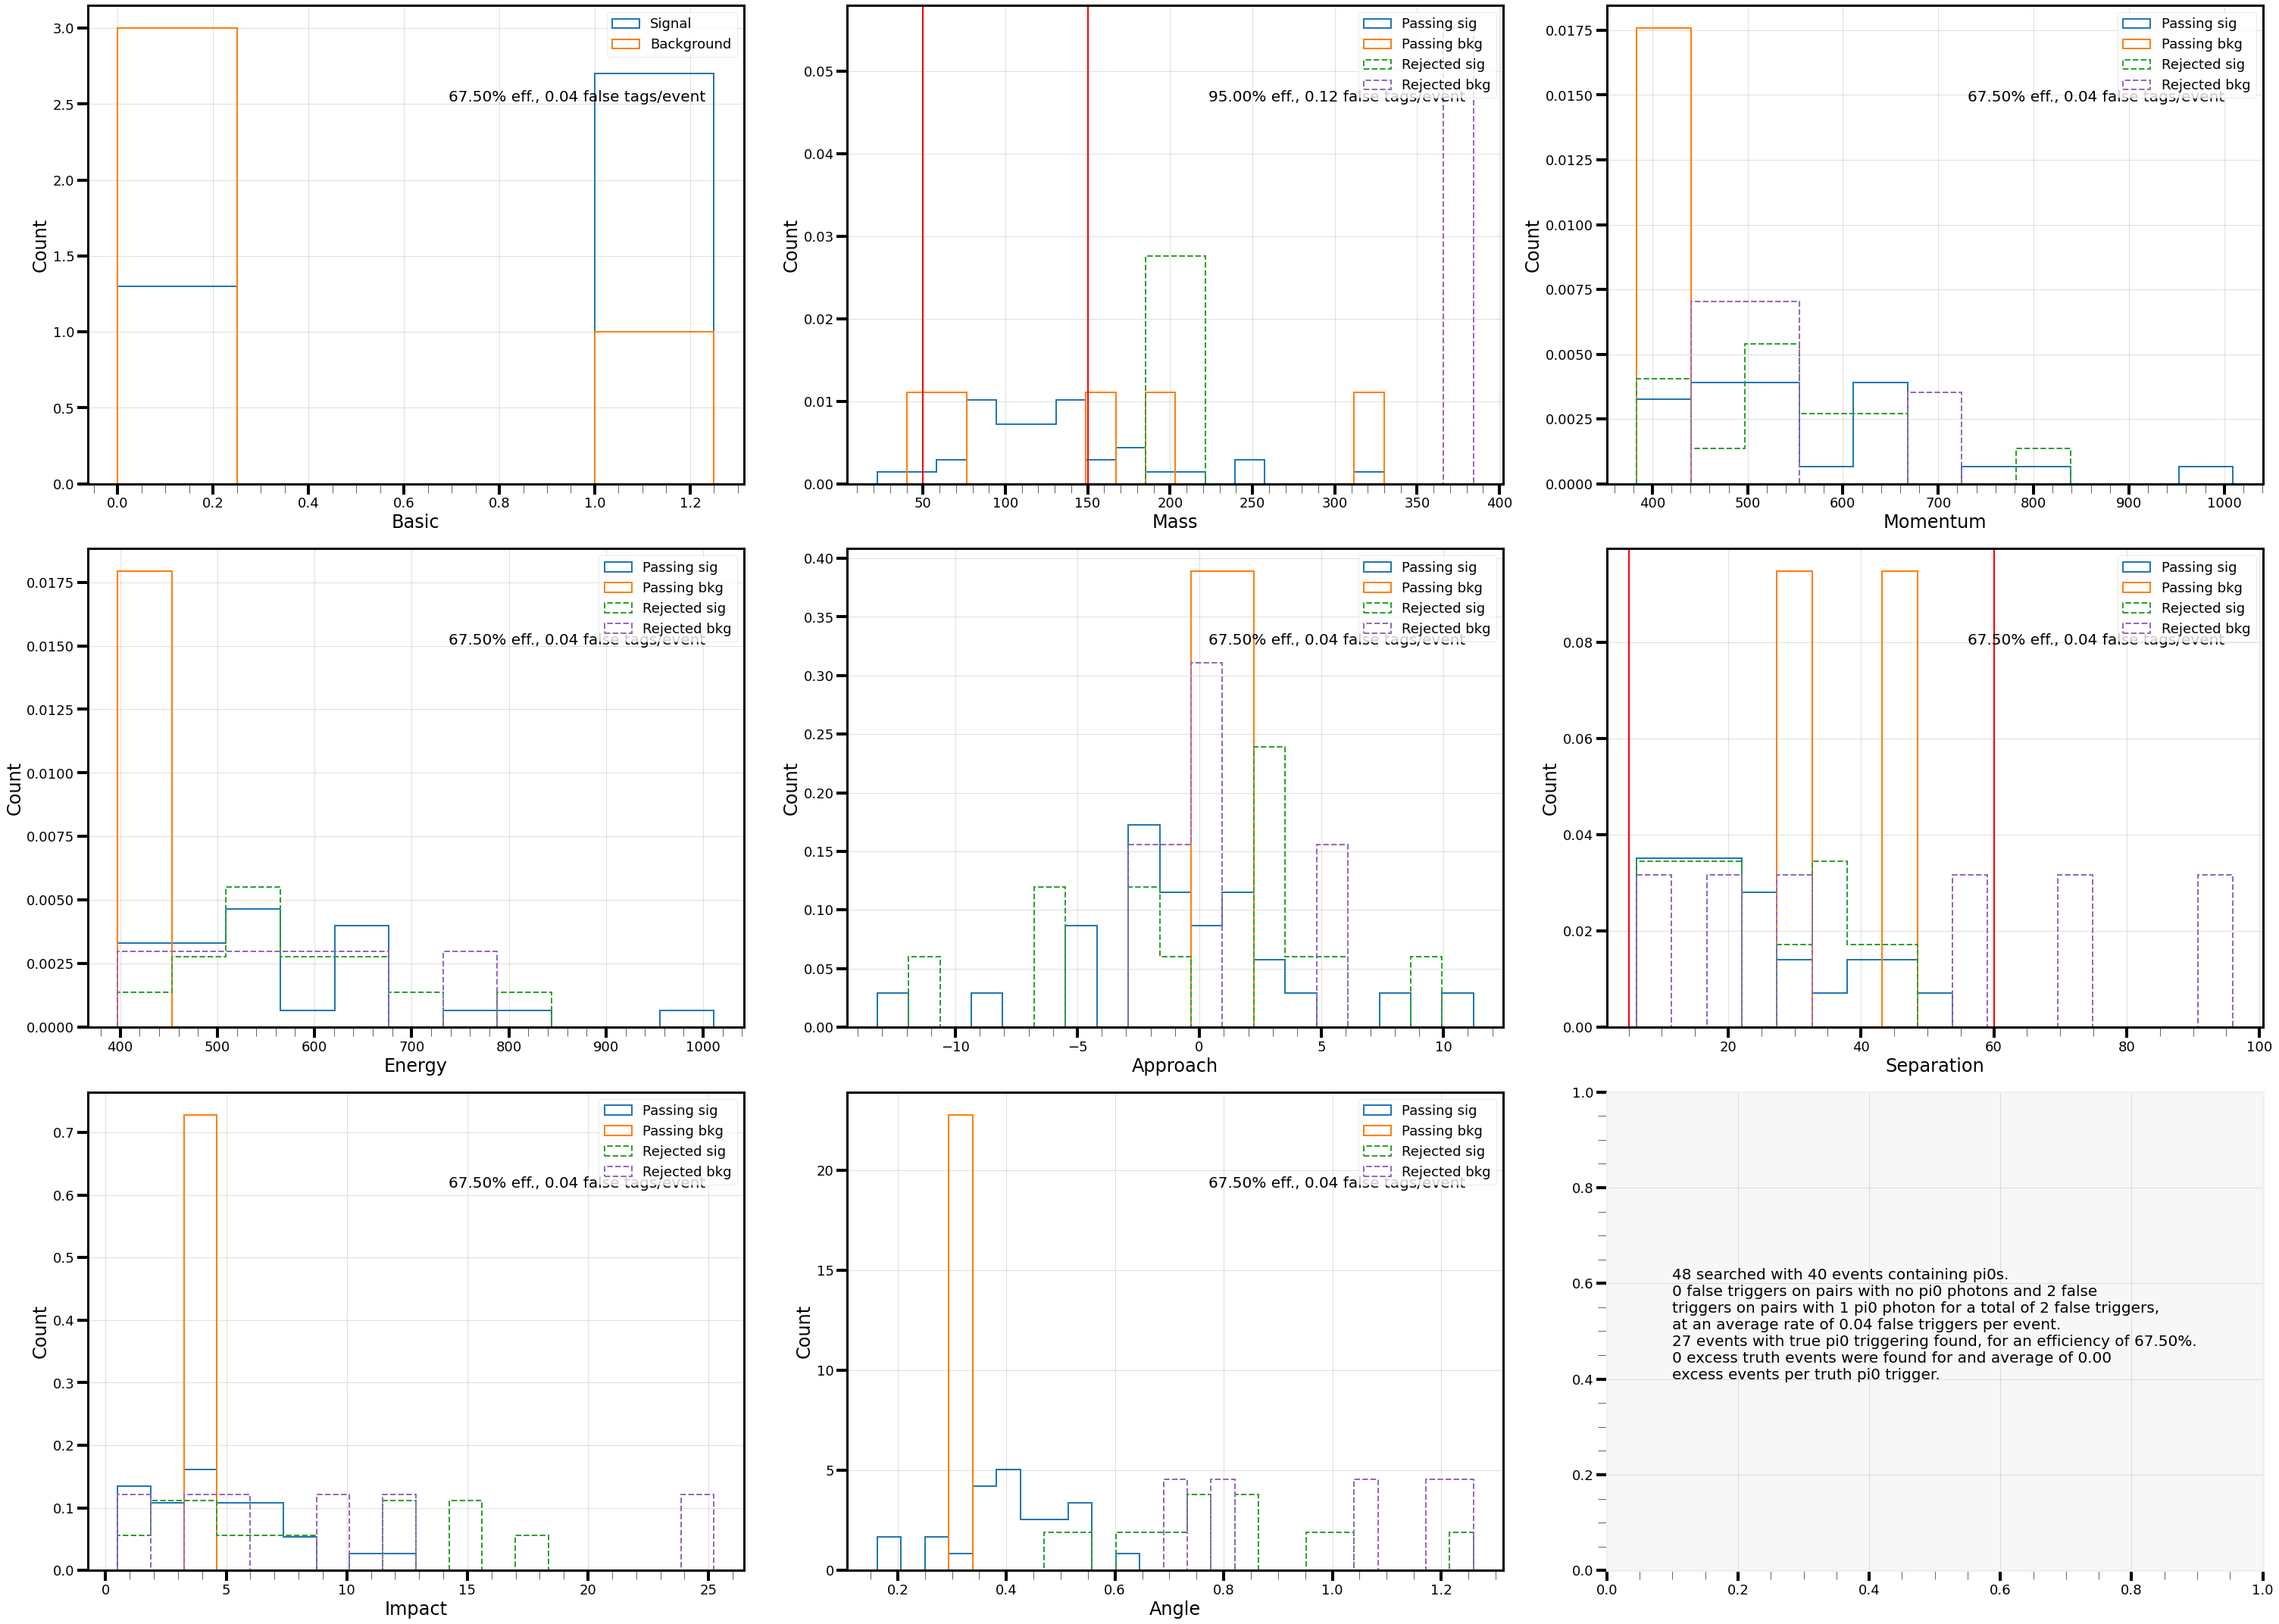

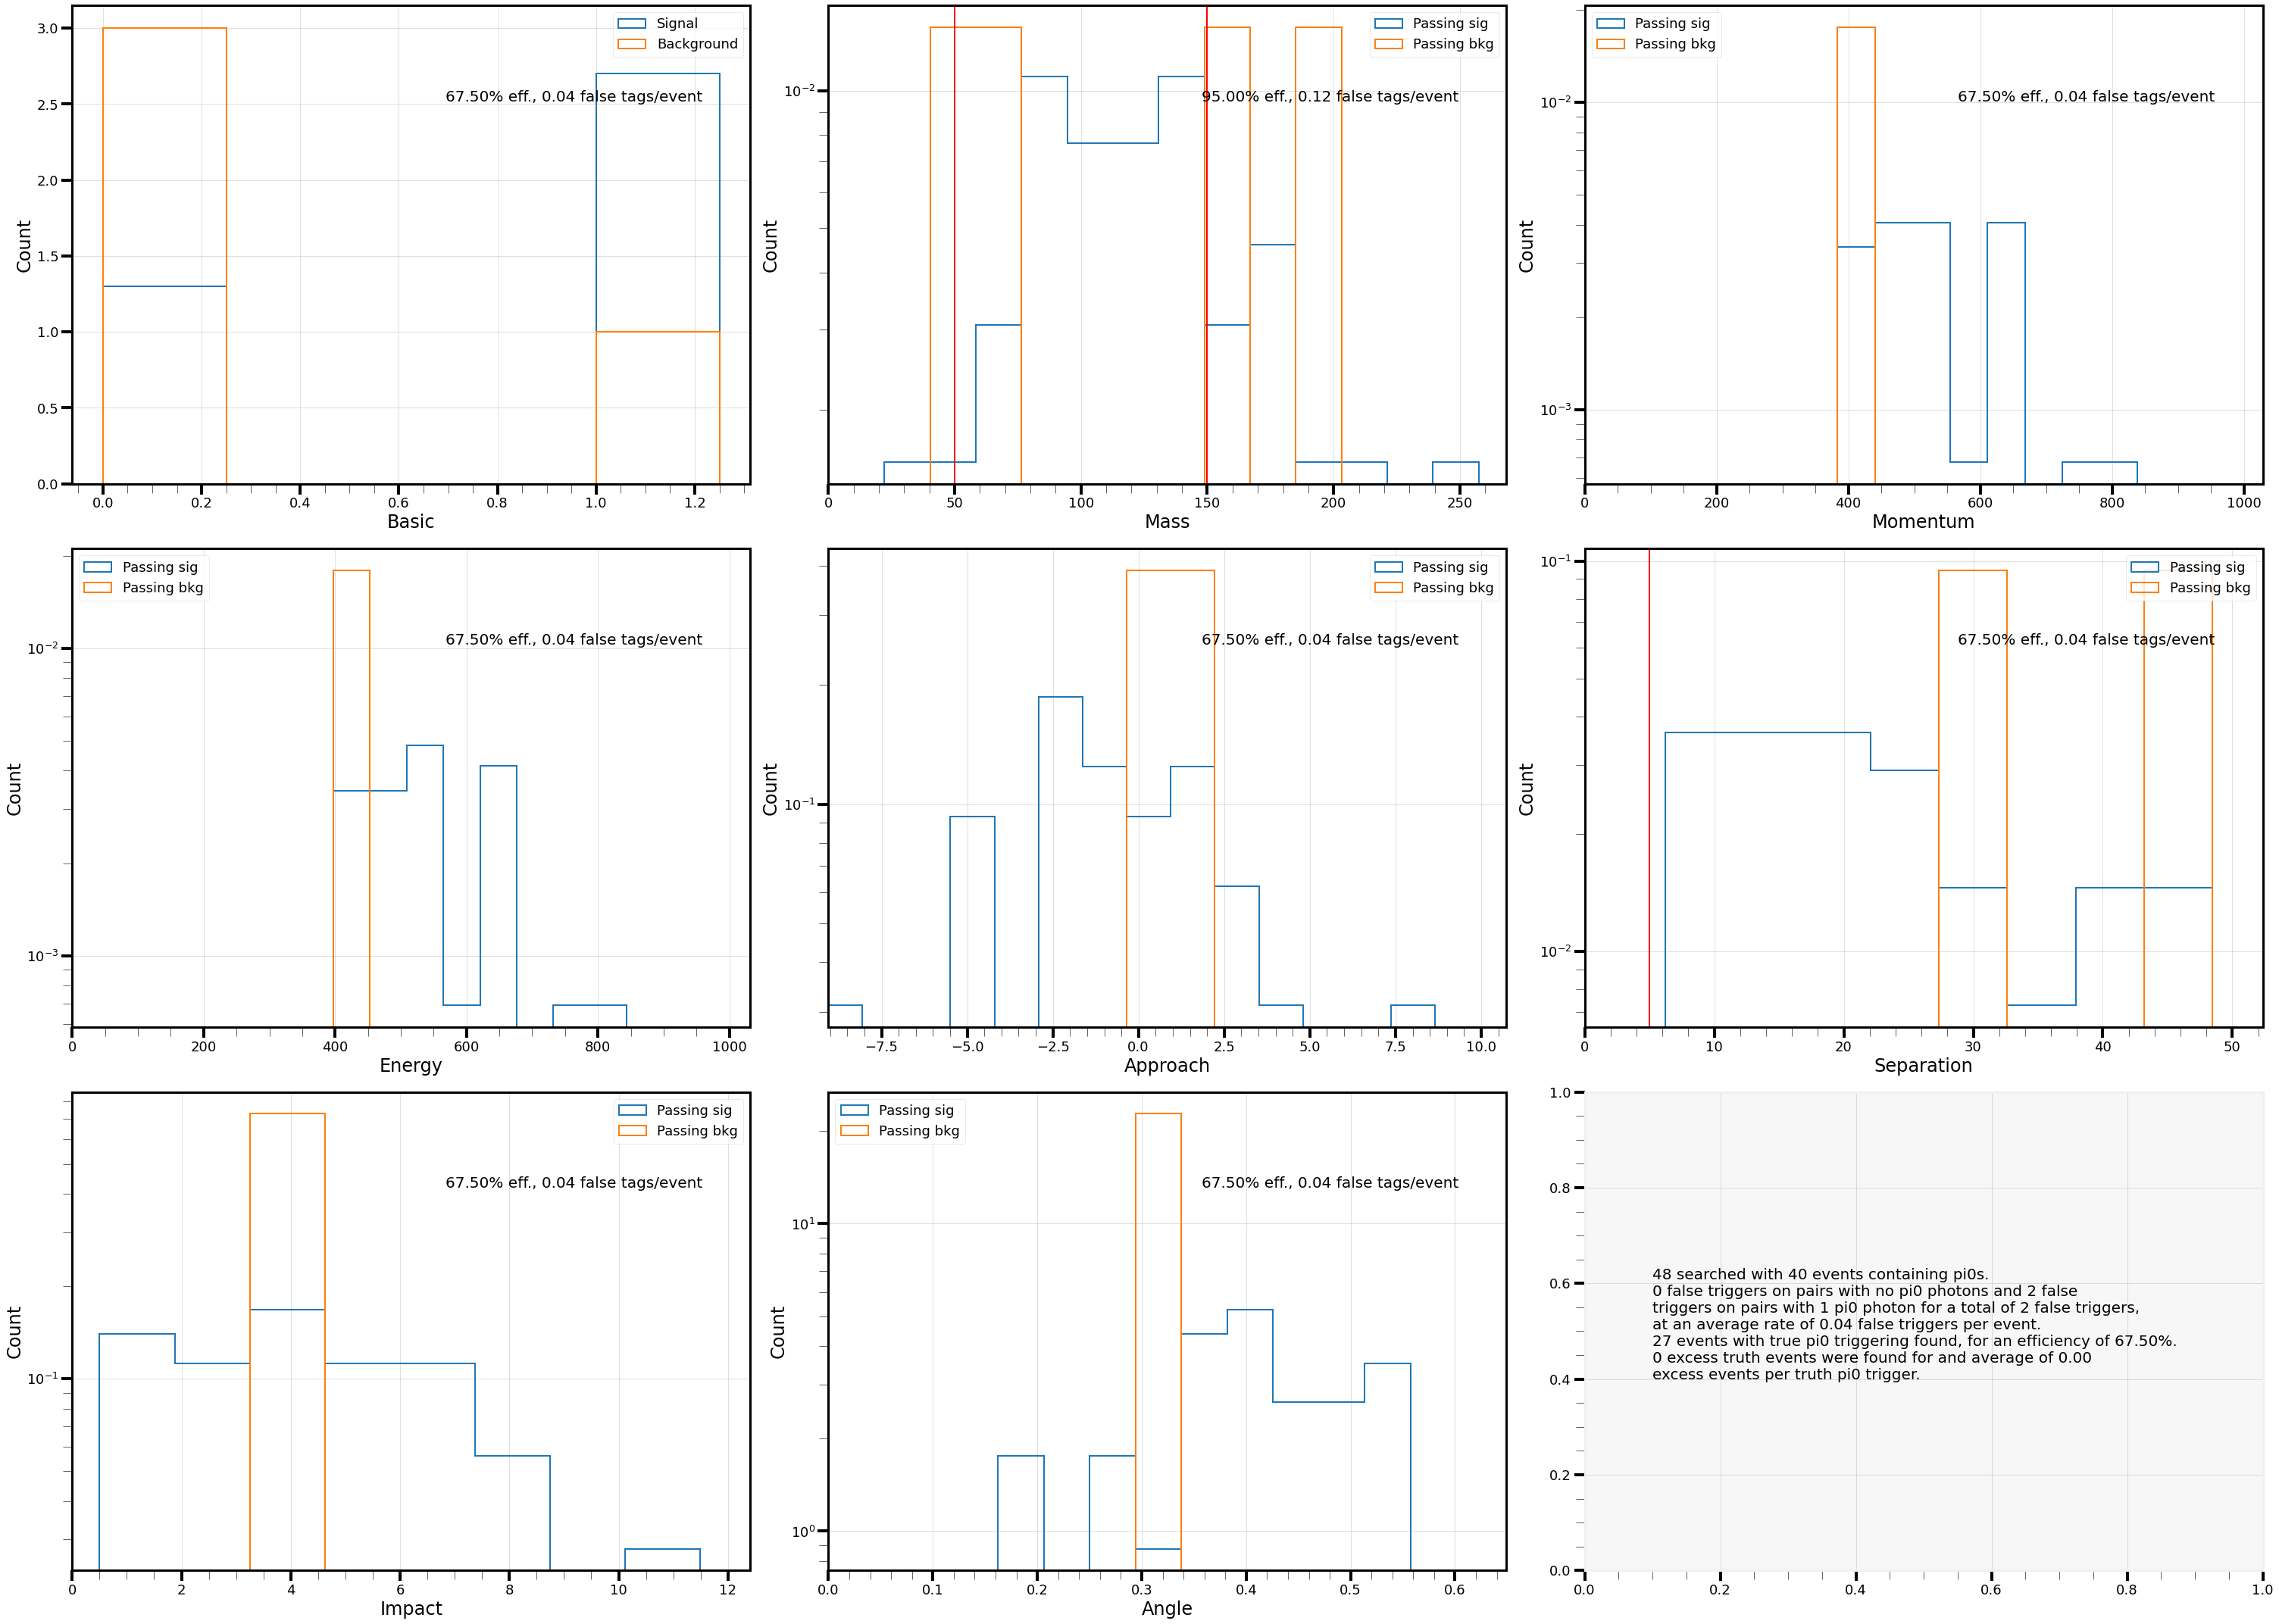

In [ ]:
selectors = SelectorEvaluator(evts, pair_coords, sig_count)
selectors.add_selector_metric("basic", mass_cuts=(50,150), approach_cuts=40, impact_cuts=40, separation_cuts=(5,60))

selectors.make_n_minus_1_summary("basic", "mass")
selectors.make_n_minus_1_per_property("basic")
selectors.make_n_minus_1_per_property("basic", style="display")

In [ ]:
# sig_evts = photon_pairs.load_and_cut_data("/scratch/wx21978/pi0/root_files/1GeV_beam_v3/Prod4a_1GeV_BeamSim_00.root", batch_size = -1, batch_start = -1, pion_count="one", two_photon=True)
# bkg_evts = photon_pairs.load_and_cut_data("/scratch/wx21978/pi0/root_files/1GeV_beam_v3/Prod4a_1GeV_BeamSim_00.root", batch_size = -1, batch_start = -1, pion_count="zero", two_photon=False)

# #TODO Split into a background and signal version
# # For bkg, use onl

# sig_pair_coords = ak.argcombinations(sig_evts.recoParticles.number, 2)
# bkg_pair_coords = ak.argcombinations(bkg_evts.recoParticles.number, 2)

# sig_count_single = photon_pairs.get_sig_count(sig_evts, sig_pair_coords, single_best=True) # This isn't working as the "best" method wasnt' designed to deal with this
# sig_count_multi = photon_pairs.get_sig_count(sig_evts, sig_pair_coords)
# bkg_count_multi = photon_pairs.get_sig_count(bkg_evts, bkg_pair_coords)


# sig_masses = photon_pairs.paired_mass(sig_evts, sig_pair_coords)
# sig_momenta = vector.magnitude(photon_pairs.paired_momentum(sig_evts, sig_pair_coords))
# sig_energies = photon_pairs.paired_energy(sig_evts, sig_pair_coords)
# sig_approaches = photon_pairs.paired_closest_approach(sig_evts, sig_pair_coords)
# sig_separations = photon_pairs.paired_separation(sig_evts, sig_pair_coords)
# sig_impacts = photon_pairs.paired_beam_impact(sig_evts, sig_pair_coords)
# sig_angles = photon_pairs.paired_opening_angle(sig_evts, sig_pair_coords)

# bkg_masses = photon_pairs.paired_mass(bkg_evts, bkg_pair_coords)
# bkg_momenta = vector.magnitude(photon_pairs.paired_momentum(bkg_evts, bkg_pair_coords))
# bkg_energies = photon_pairs.paired_energy(bkg_evts, bkg_pair_coords)
# bkg_approaches = photon_pairs.paired_closest_approach(bkg_evts, bkg_pair_coords)
# bkg_separations = photon_pairs.paired_separation(bkg_evts, bkg_pair_coords)
# bkg_impacts = photon_pairs.paired_beam_impact(bkg_evts, bkg_pair_coords)
# bkg_angles = photon_pairs.paired_opening_angle(bkg_evts, bkg_pair_coords)

In [ ]:
# Pair selector
init_cut_metric = cut_metric_generator(mass_cuts=(50,150), approach_cuts=40, impact_cuts=40, separation_cuts=(5,60))

In [ ]:
# sig_count = tagging
get_efficiency_fpr_stats(init_cut_metric(masses, momenta, energies, approaches, separations, impacts, angles) > 0.5, sig_count, print_results=True)
# Get this to produce a metric, i.e. signal/sqrt(bkg)

# Not "triggers" - fake pairs

824 searched with 406 events containing pi0s.
82 false triggers on pairs with no pi0 photons and 518 false triggers on pairs with 1 pi0 photon
for a total of 600 false triggers, at an average rate of 0.73 false triggers per event.
278 events with true pi0 triggering found, for an efficiency of 68.47%.
59 excess truth events were found for and average of 0.15 excess events per truth pi0 trigger.


(0.6847290640394089, 0.7281553398058253)

In [ ]:
selectors = SelectorEvaluator(evts, pair_coords, sig_count)
selectors.add_metric("basic", selectors.wrap_metric_arguments(init_cut_metric))

selectors.make_n_minus_1_summary("basic", "mass")
selectors.make_n_minus_1_per_property("basic")
selectors.make_n_minus_1_per_property("basic", style="display")

NameError: name 'init_cut_metric' is not defined

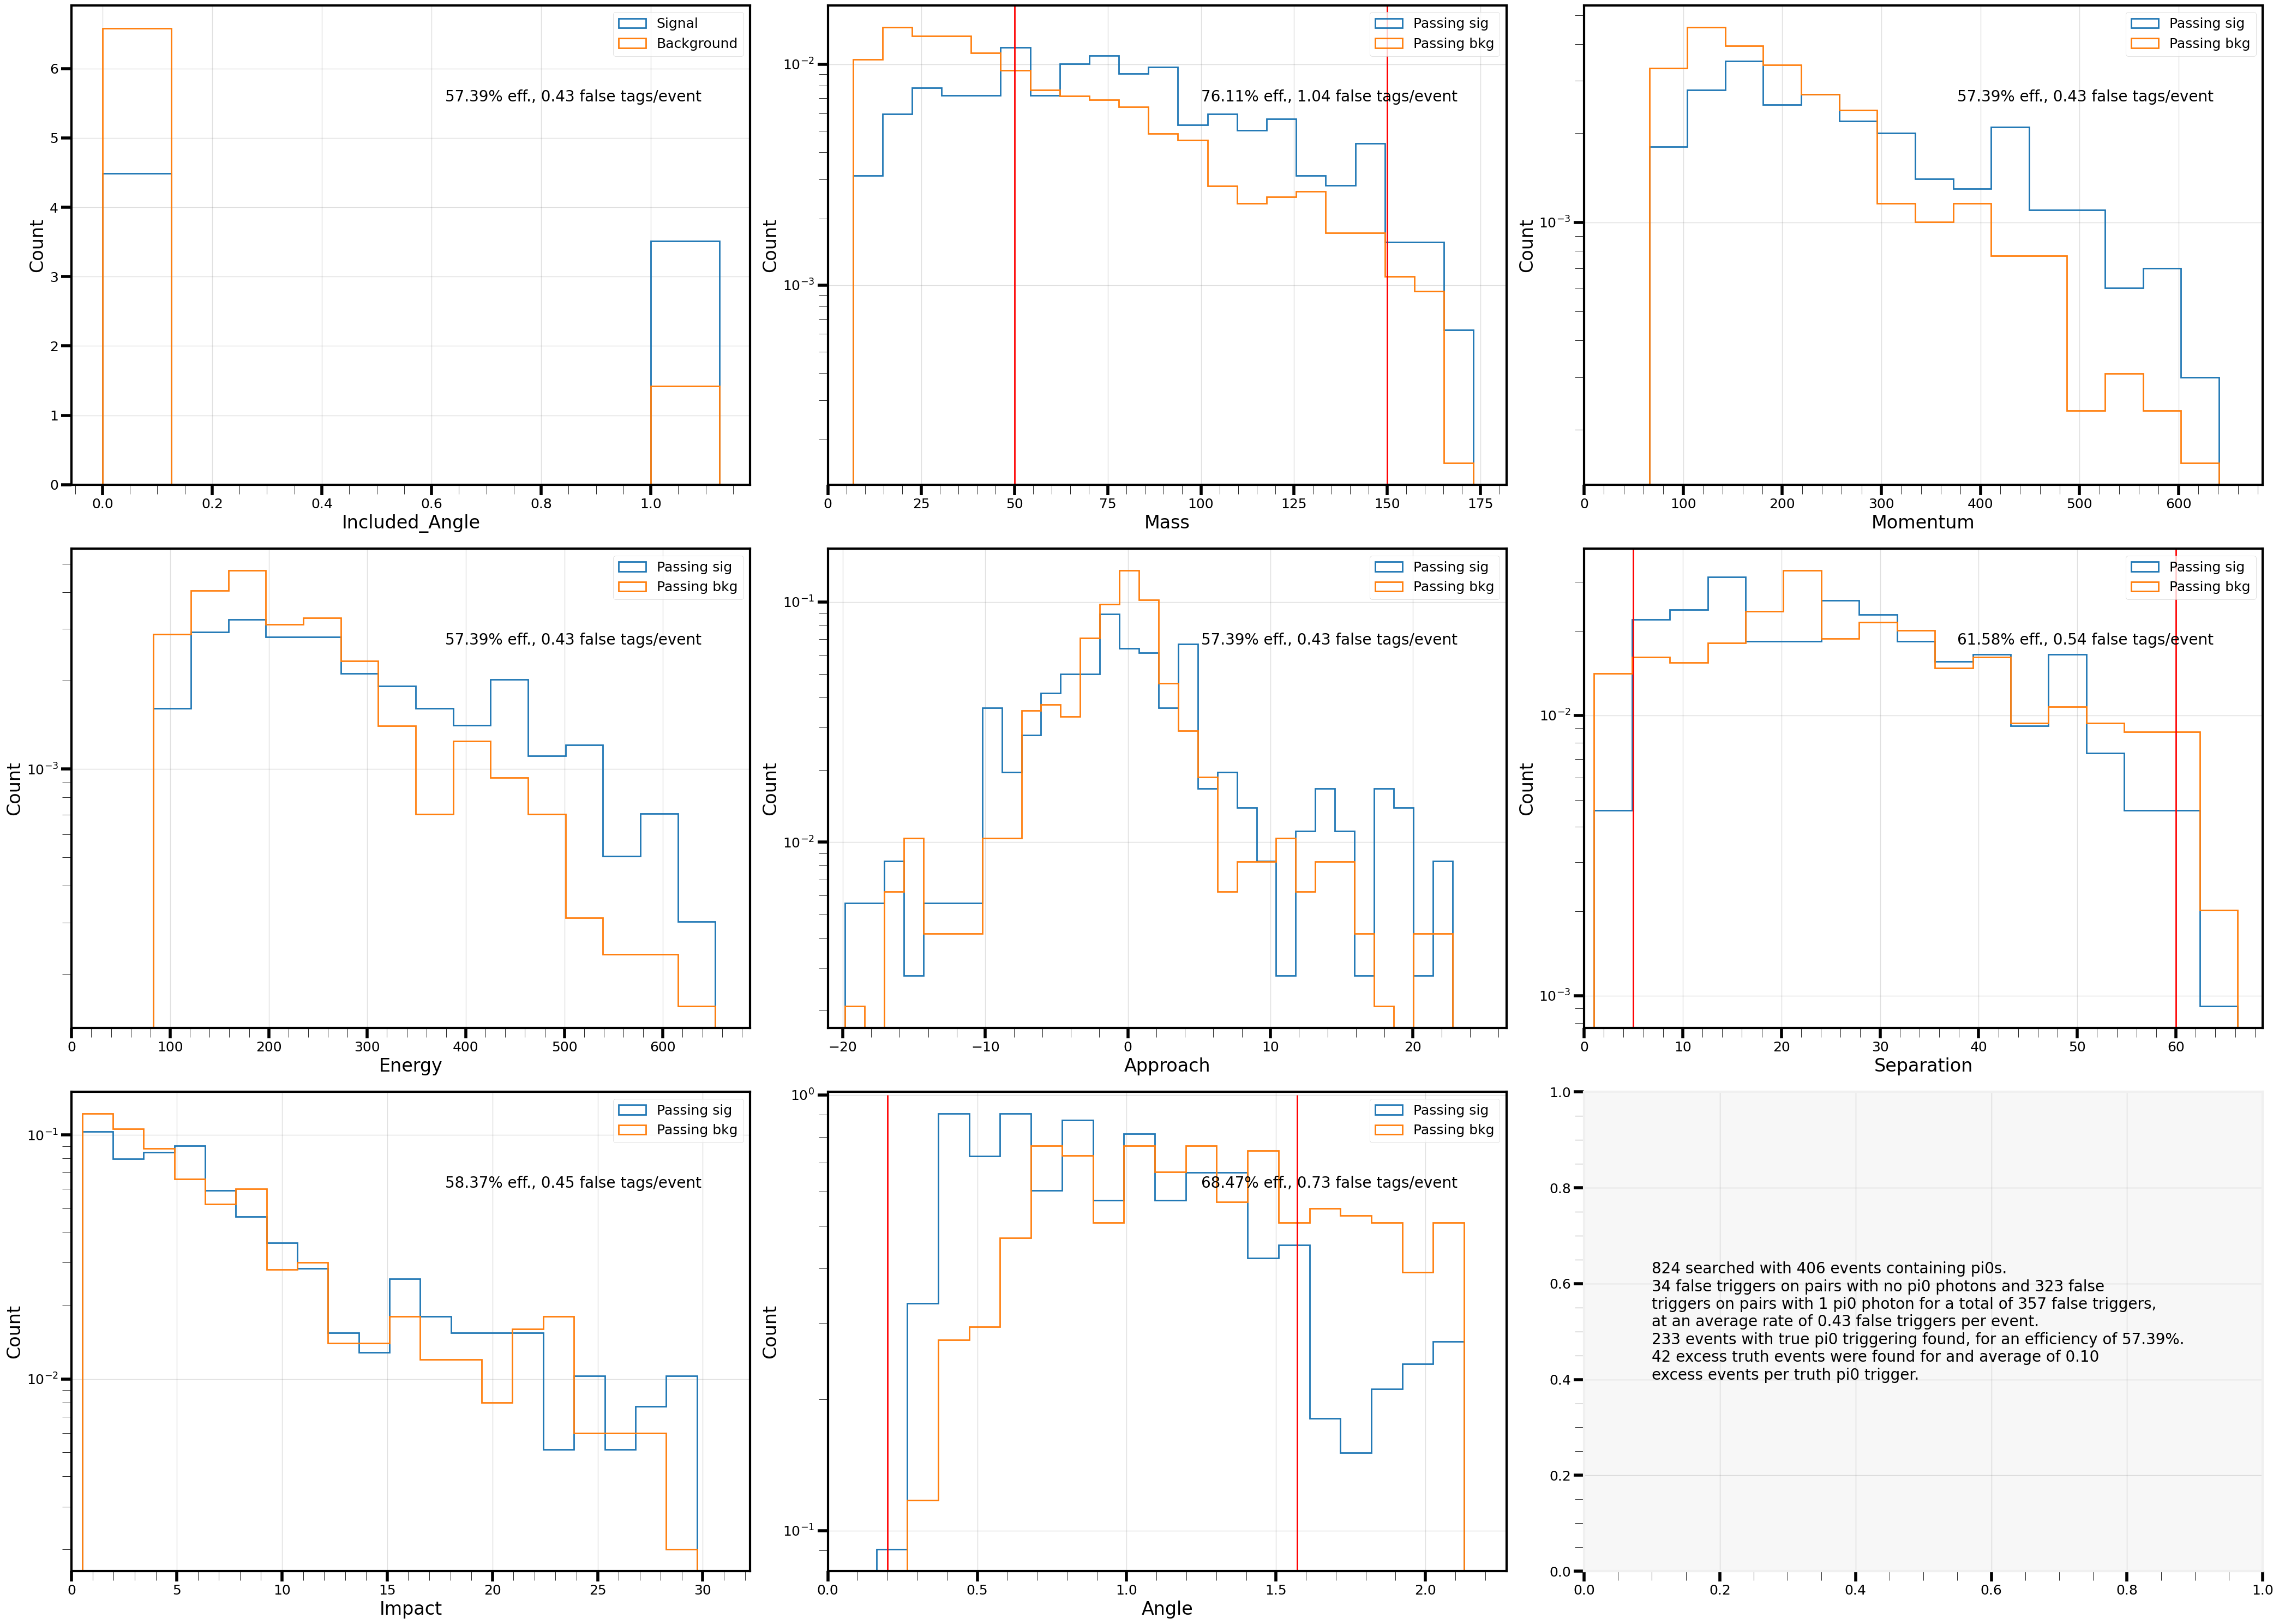

In [ ]:
selectors.add_selector_metric("included_angle", mass_cuts=(50,150), approach_cuts=40, impact_cuts=40, separation_cuts=(5,60), angle_cuts=(0.2, np.pi/2))

selectors.make_n_minus_1_per_property("included_angle", style="display")

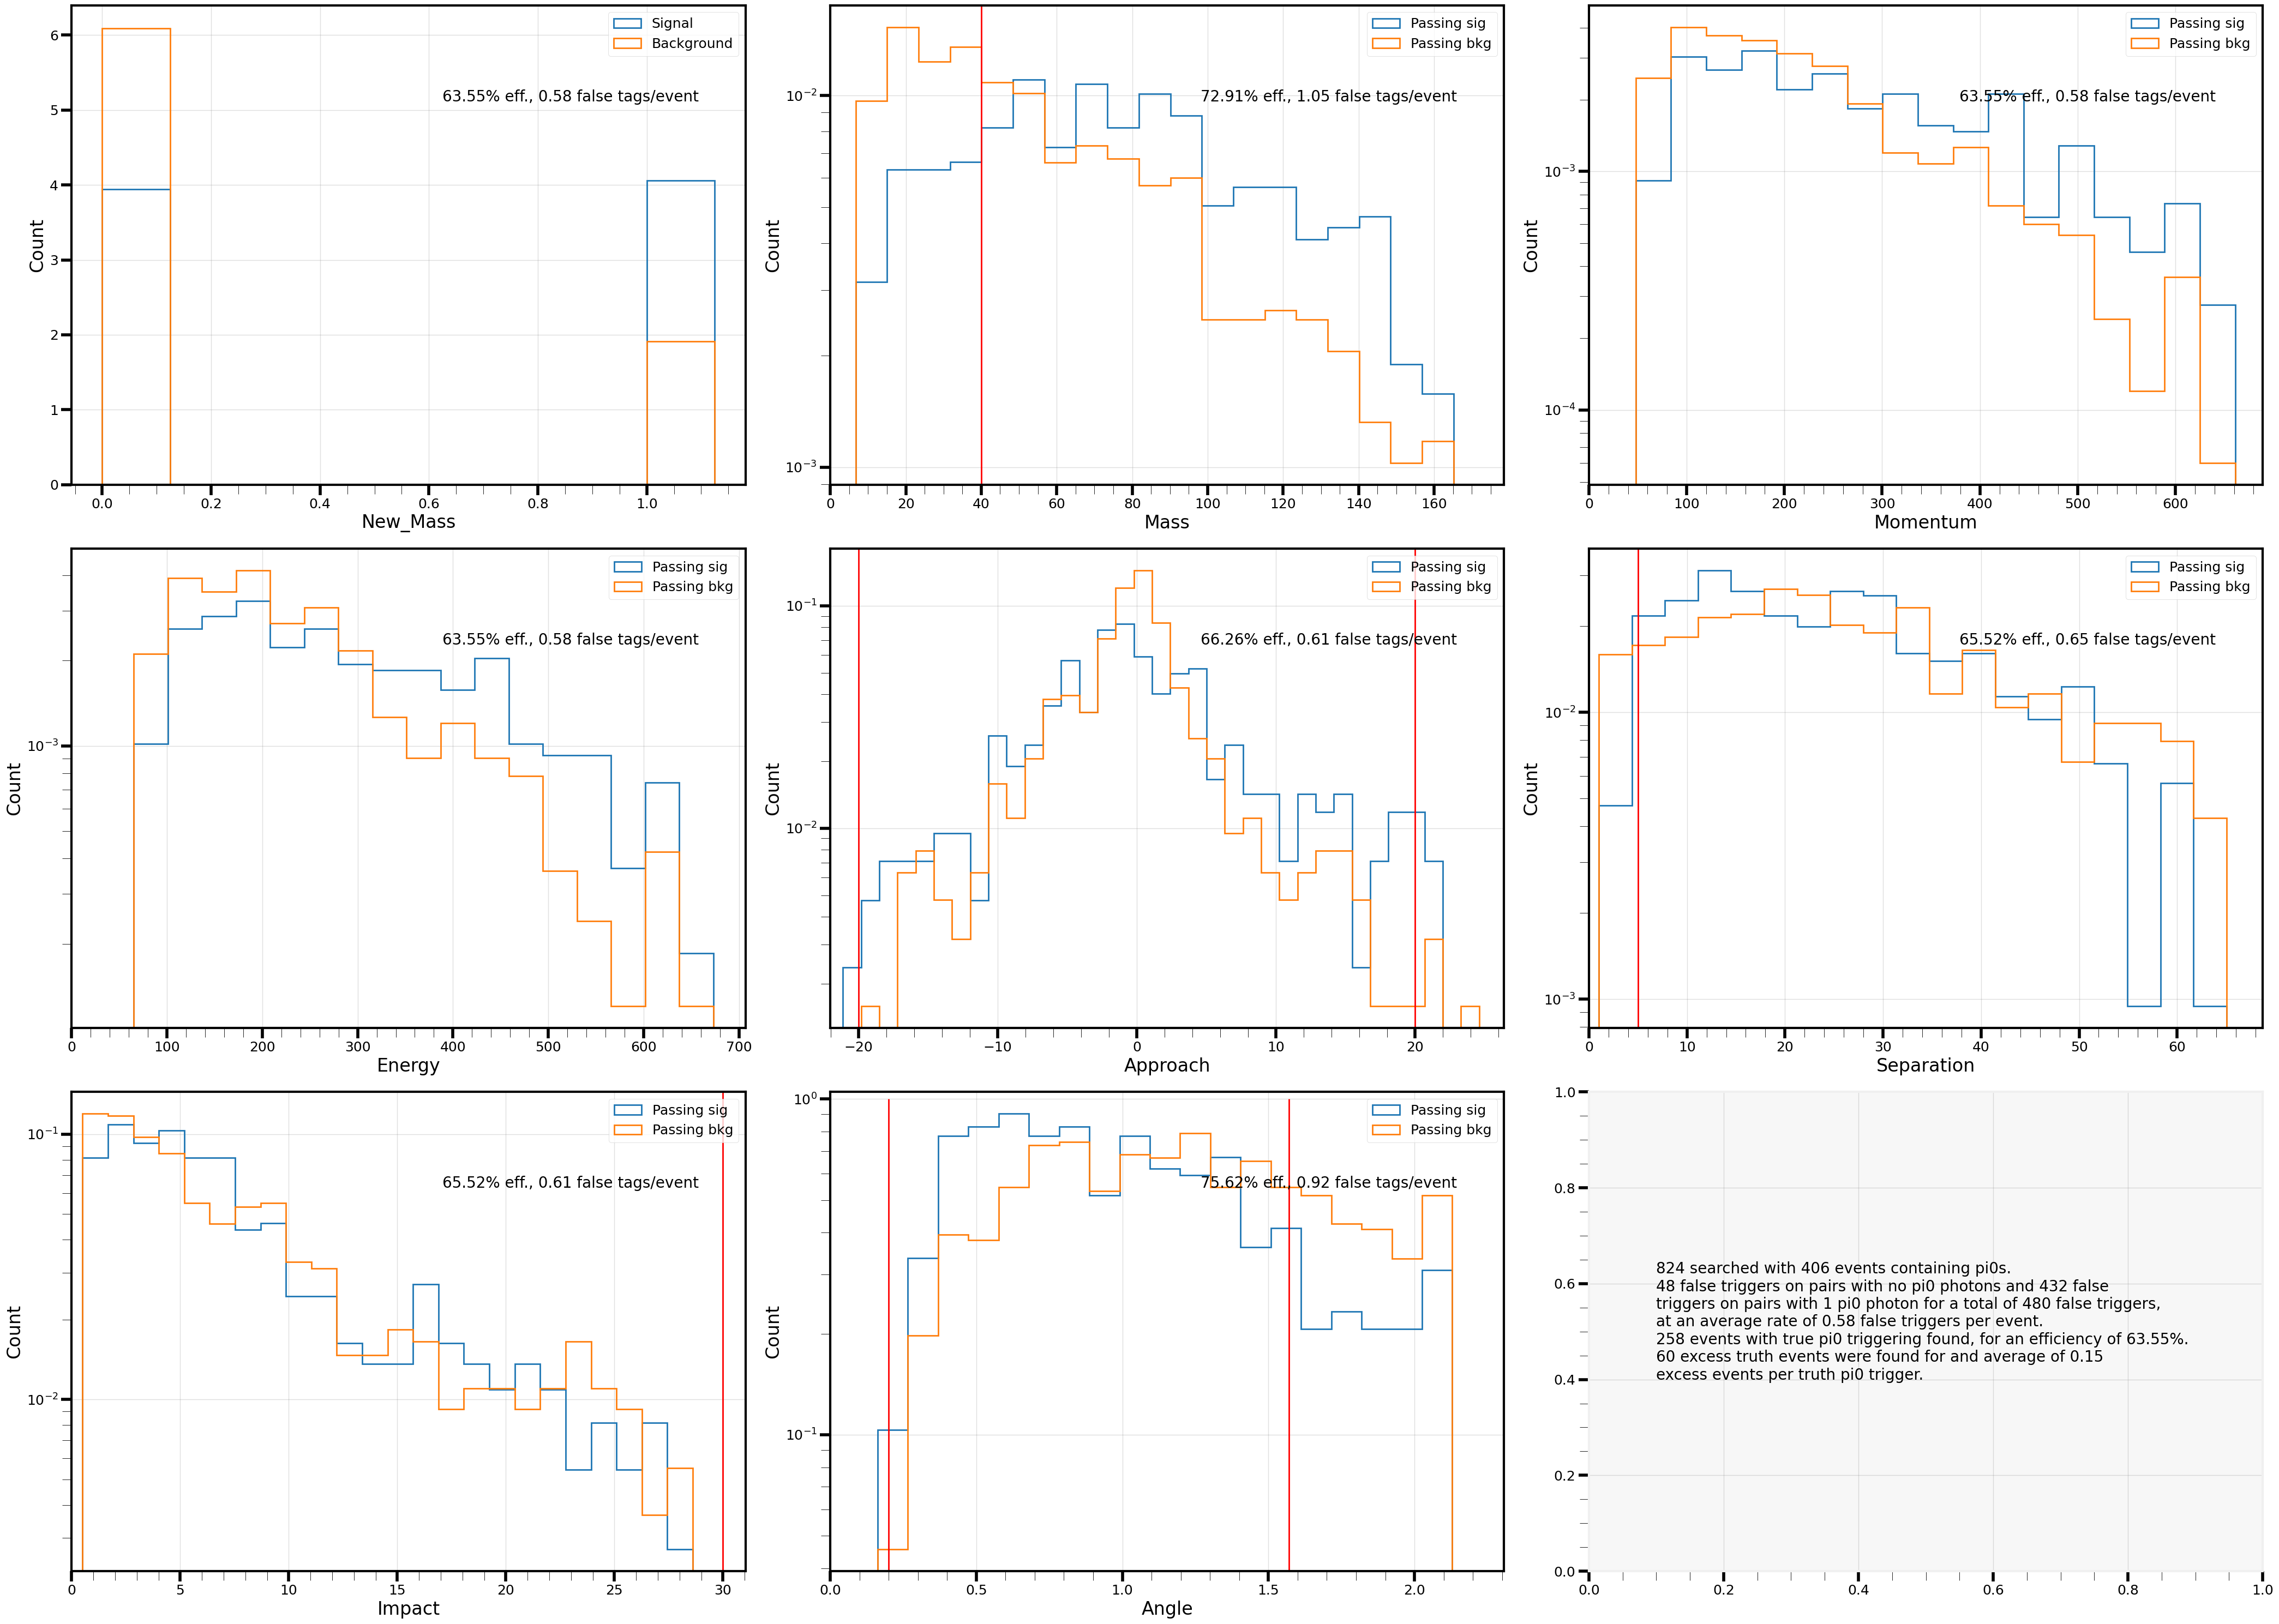

In [ ]:
selectors.add_selector_metric("new_mass", mass_cuts=(40,180), approach_cuts=20, impact_cuts=30, separation_cuts=(5,80), angle_cuts=(0.2, np.pi/2))

selectors.make_n_minus_1_per_property("new_mass", style="display")

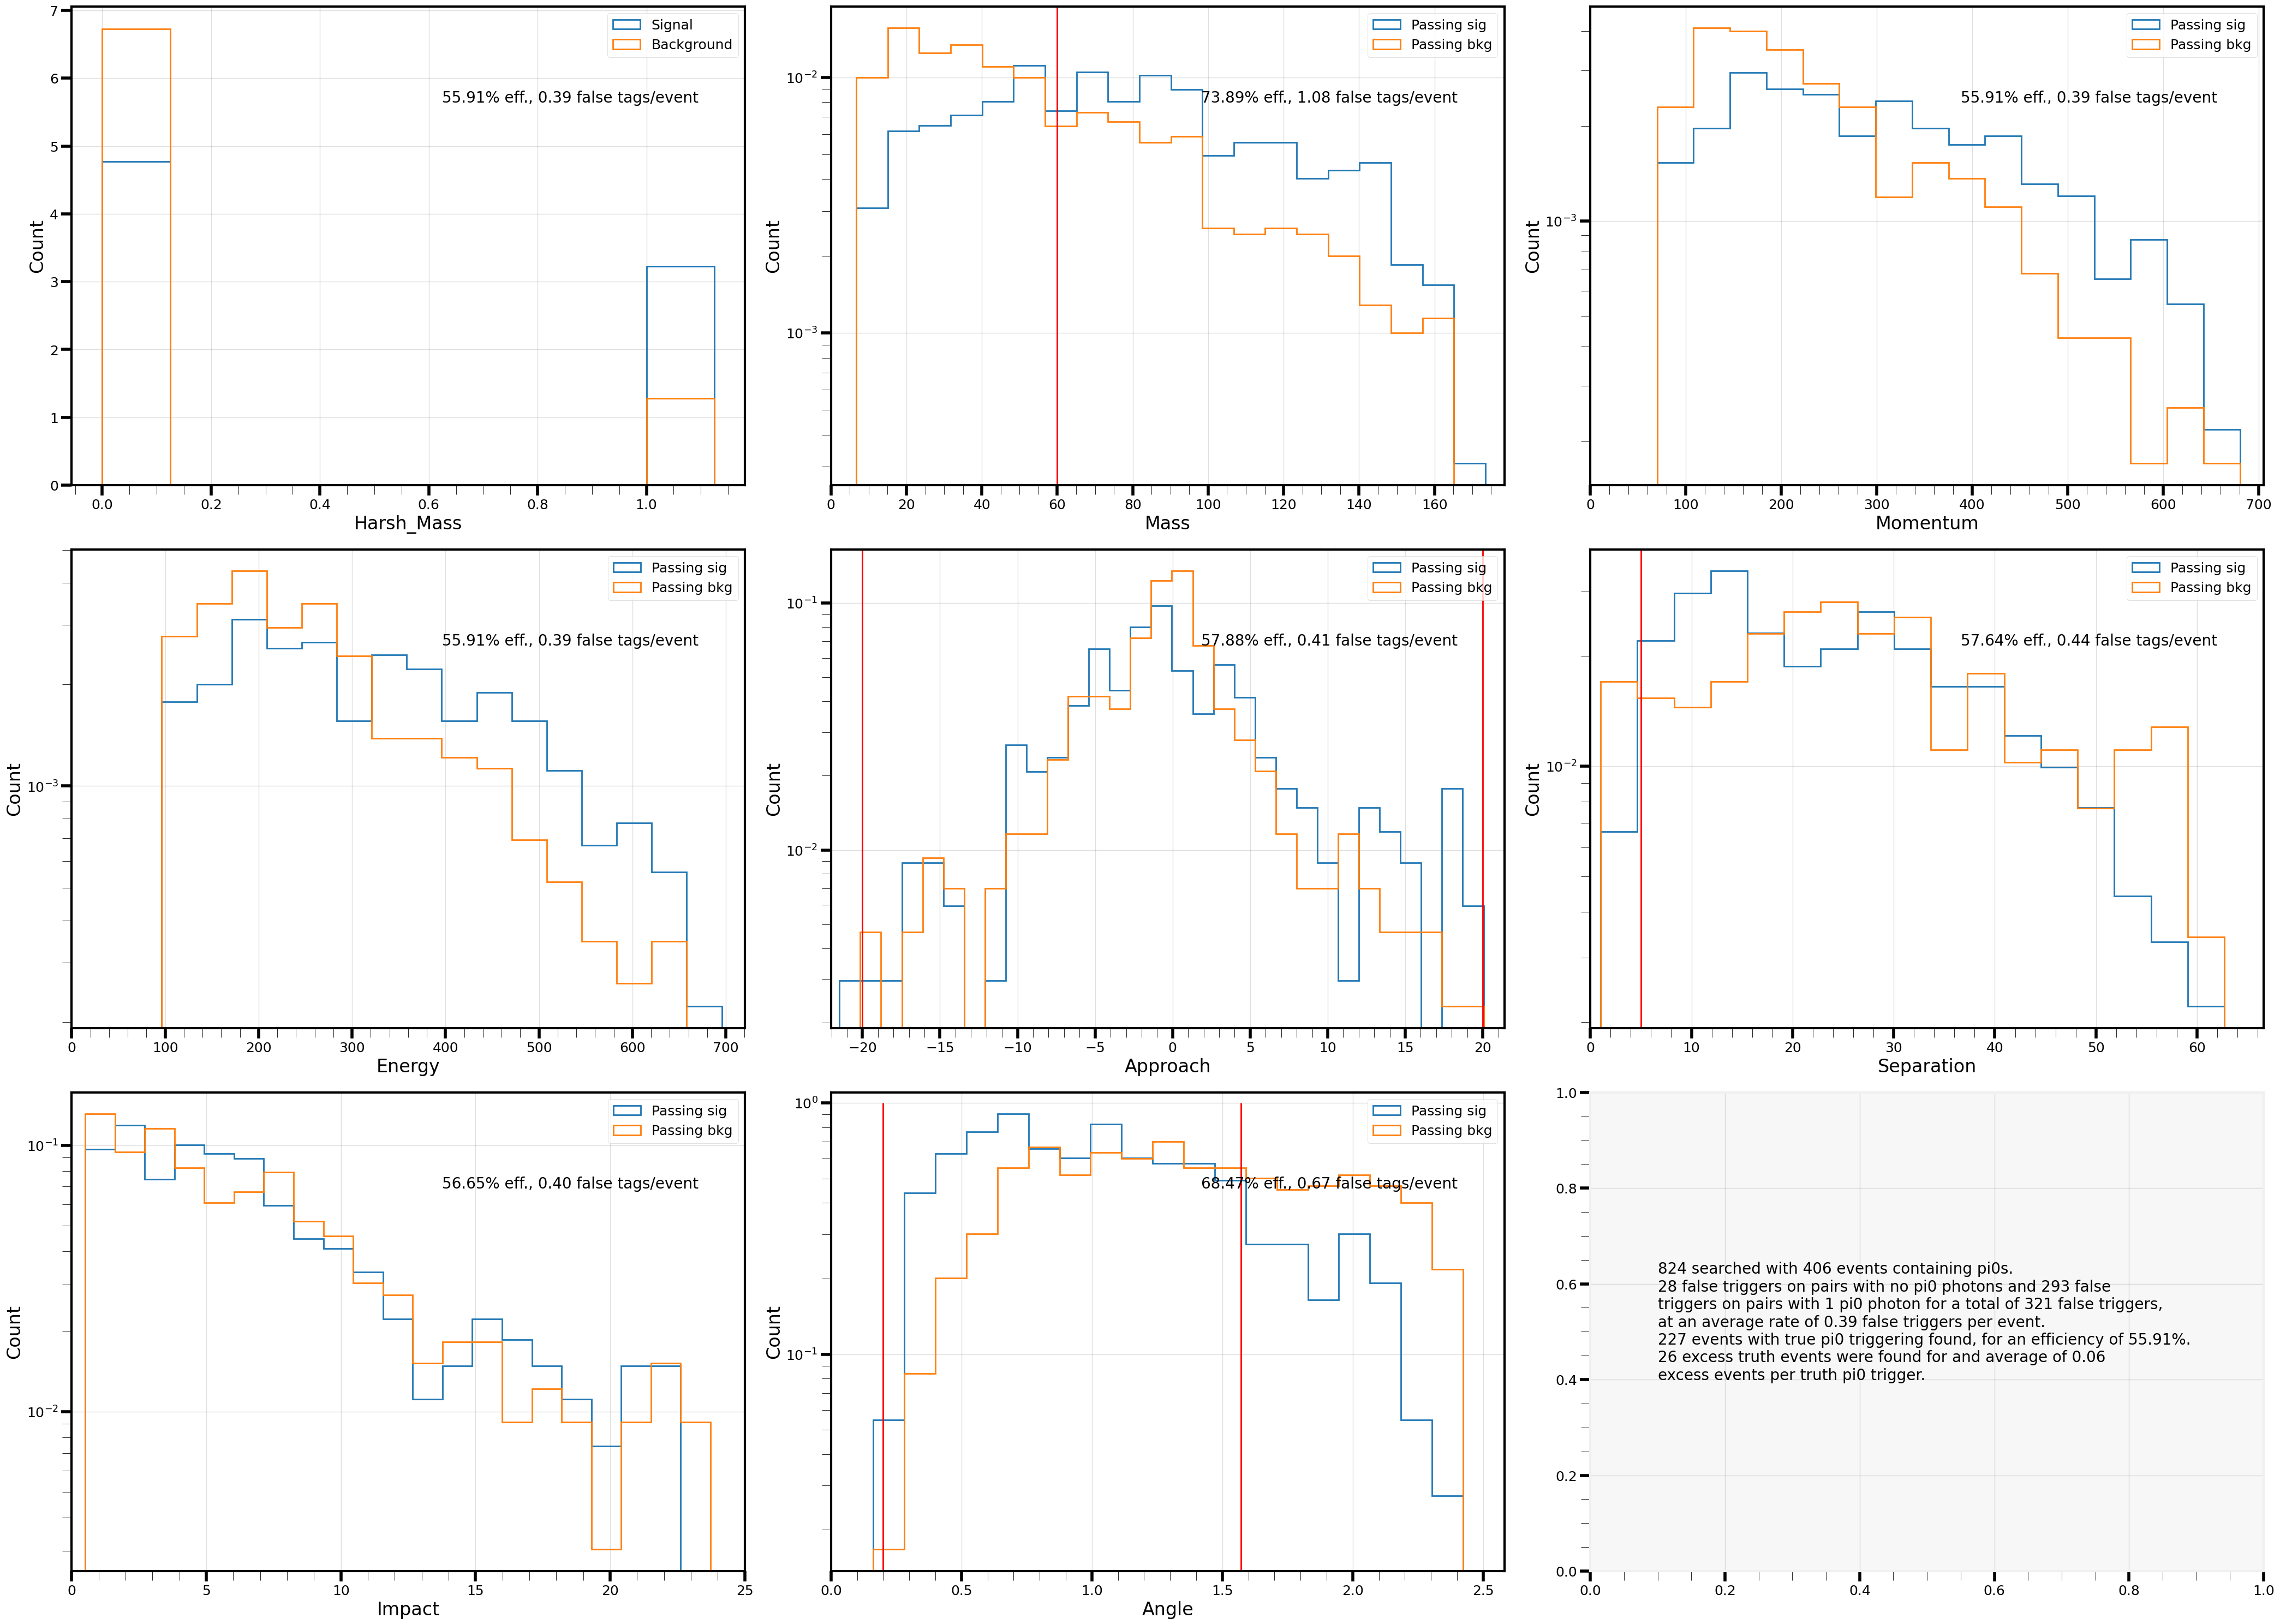

In [ ]:
selectors.add_selector_metric("harsh_mass", mass_cuts=(60,180), approach_cuts=20, impact_cuts=40, separation_cuts=(5,80), angle_cuts=(0.2, np.pi/2))

selectors.make_n_minus_1_per_property("harsh_mass", style="display")

In [ ]:
def comb_metric(mass, momentum, energy, approach, separation, impact, angle):
    initial_offset = 100
    
    approach_divisor = 0.01
    separation_divisor = 0.01
    impact_divisor = 0.01

    geometry_metric = np.exp( - approach**2/approach_divisor - separation**2/separation_divisor - impact**2/impact_divisor)

    # geometry_metric = geometry_metric * np.sin(angle)**2

    mass_mean = 110
    mass_sigma = 30

    energy_metric = np.exp(-(mass-mass_mean)**2/mass_sigma)
    energy_metric=1
    
    return np.exp(initial_offset) * geometry_metric * energy_metric

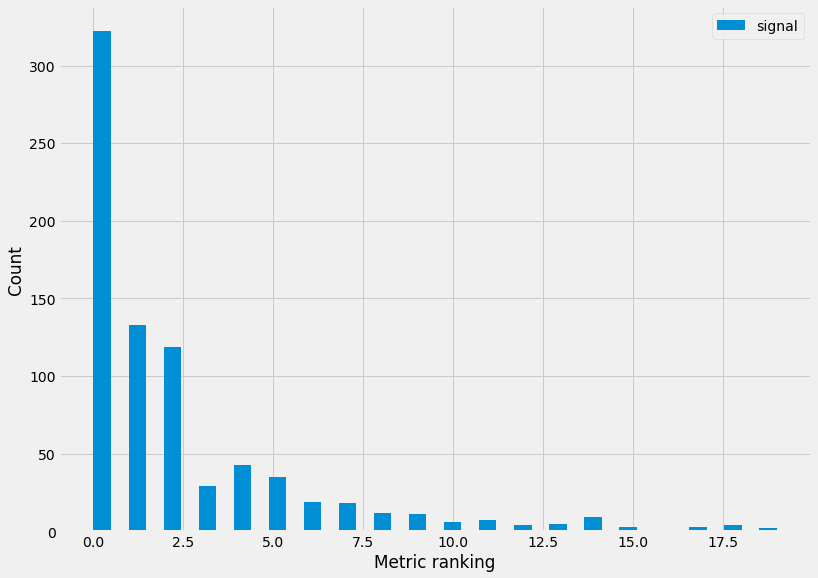

0.3640776699029126


In [ ]:
metric_rank = ak.argsort(comb_metric(masses, momenta, energies, approaches, separations, impacts, angles), ascending=True)[truth_mask]

plot_rank_hist_nb("Metric", metric_rank, y_scaling='linear')

print(np.sum(metric_rank == 0)/ak.num(metric_rank, axis=0))

ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

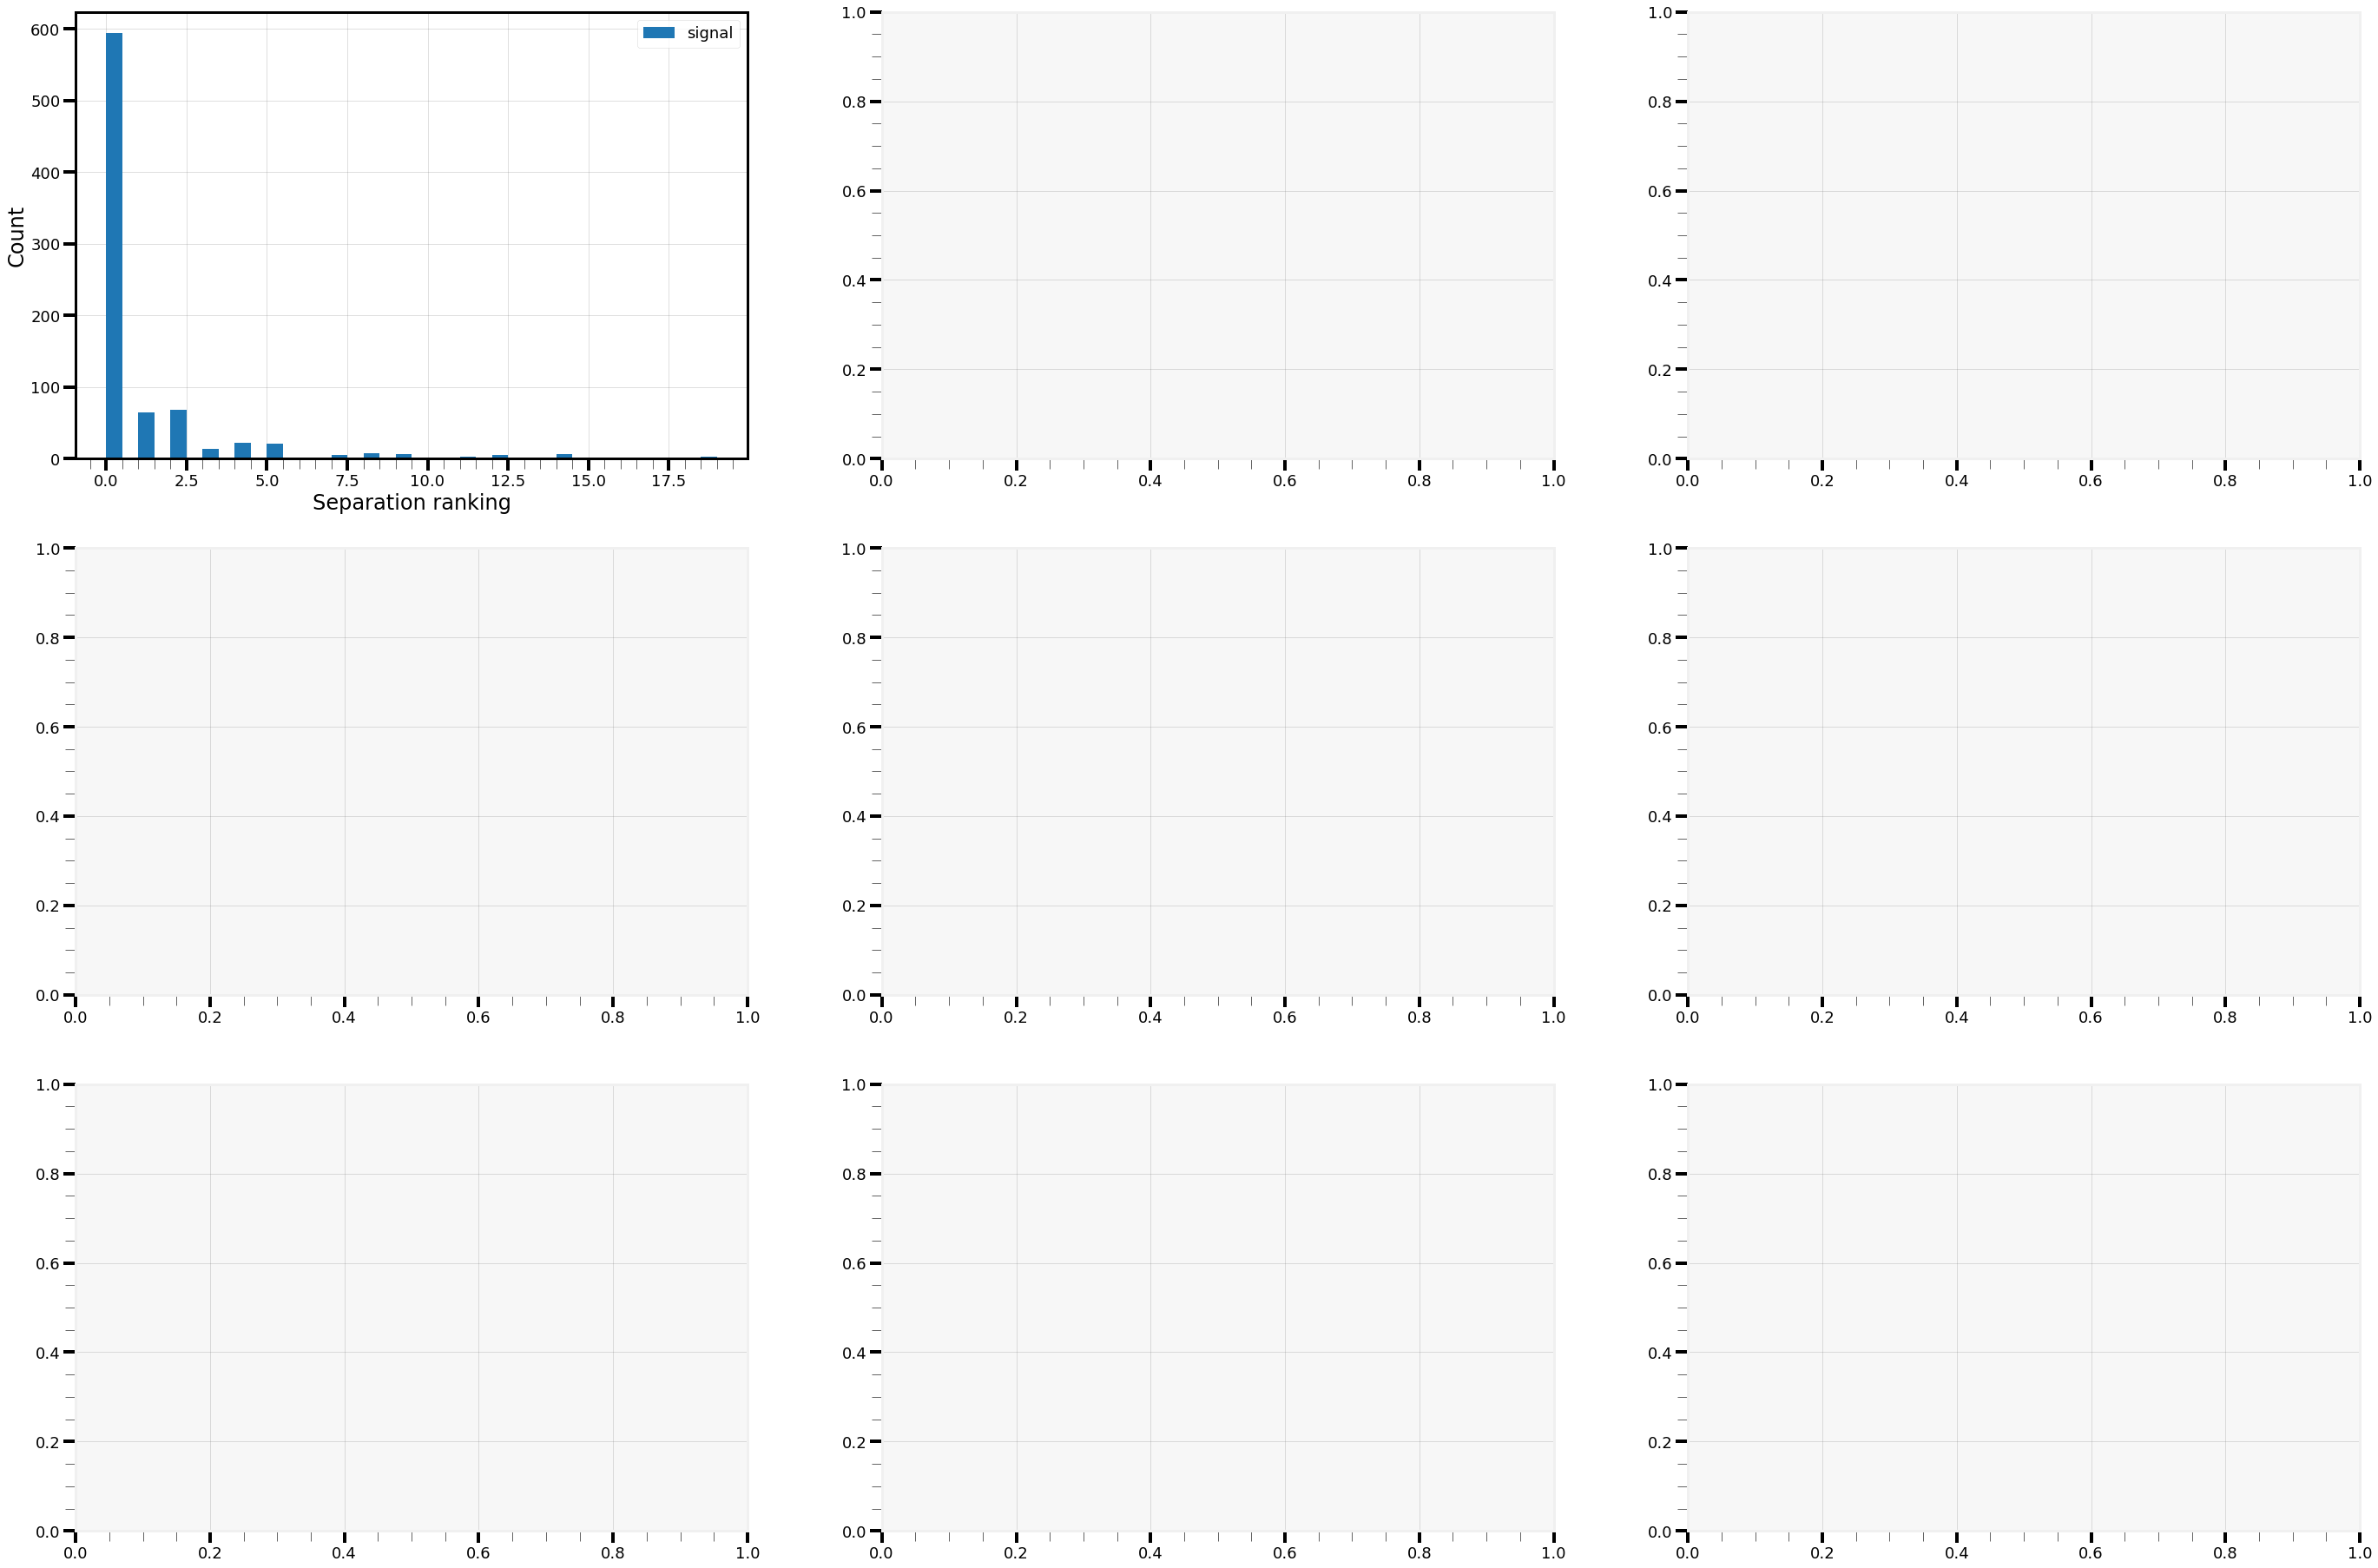

In [ ]:
def metric_generator(prop_name):
    def metric(properties):
        divisor = 10
        return np.exp(abs(properties[prop_name]) /divisor)
    return metric

def geo_metric(properties):
    initial_offset = 3
    
    approach_divisor = 10
    separation_divisor = 10
    impact_divisor = 10
    
    angle_metric = np.cos((properties["angle"]-np.pi/16)/0.75)

    geometry_metric = np.exp(- initial_offset + abs(properties["approach"])/approach_divisor + abs(properties["separation"])/separation_divisor + abs(properties["impact"])/impact_divisor)
    
    return geometry_metric * np.exp(-angle_metric)

def geo_metric_angle(properties):
    angle_metric = np.cos((properties["angle"]-np.pi/16)/0.75)
    
    return geo_metric(properties) * np.exp(-angle_metric)

metrics = RankEvaluator(evts, pair_coords, sig_count)

metrics.add_metric("separation", metric_generator("separation"))
metrics.add_metric("geometric", geo_metric)
metrics.add_metric("geo_ang", geo_metric_angle)

# Add distribution of metric itself
metrics.make_summary_plot("separation")
metrics.make_summary_plot("geometric")
metrics.make_summary_plot("geo_ang")

[False False False  True False False  True False  True False False False
  True False False False False  True  True False  True False False False
 False  True  True False False False False  True False False False False
  True False False  True False  True  True  True False False  True False
 False False  True False False False  True False  True  True False False
  True False False False  True False False  True False False False False
  True False False  True False False False False False False  True False
 False False  True  True  True False False  True False  True False False
  True False  True  True  True  True False False  True False  True False
 False False False False False  True  True False False False False False
 False  True  True False  True False  True False False False  True  True
 False  True  True False False False False False False  True False False
 False False  True False False False  True False False False False  True
 False  True False False False False False  True Fa

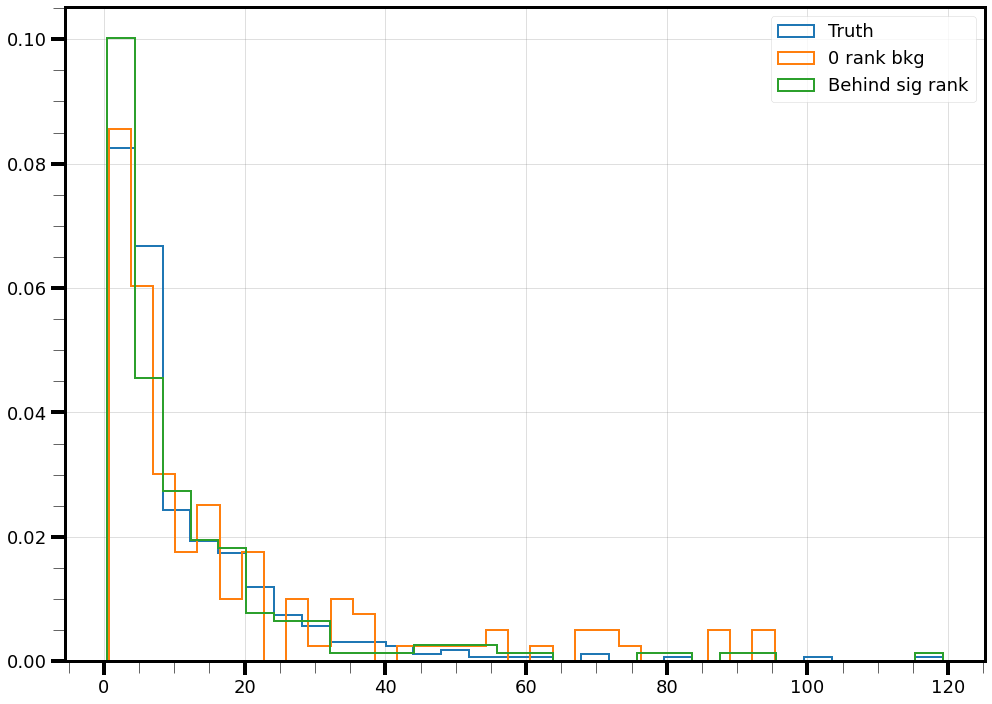

In [ ]:
ranks = ak.argsort(comb_metric(masses, momenta, energies, approaches, separations, impacts, angles), ascending=True)
bkg_ranks = ranks[np.logical_not(truth_mask)]

def get_second_rank(property):
    non_first_sig_events = np.logical_not(ranks[truth_mask] == 0).to_numpy()[:,0]
    print(non_first_sig_events)
    return

second_ranked = get_second_rank(impacts)

plt_conf.setup_figure()
plt.hist(impacts[truth_mask], **plt_conf.gen_kwargs(type="hist", density=True, label="Truth", bins=30))#plt_conf.get_bins(impacts[truth_mask])))
plt.hist(ak.pad_none(impacts[bkg_ranks == 0], 1, axis=1).to_numpy(), **plt_conf.gen_kwargs(type="hist", density=True, label="0 rank bkg", index=1, bins=30))#plt_conf.get_bins(ak.pad_none(impacts[bkg_ranks == 0], 1, axis=1).to_numpy())))

plt.hist(ak.pad_none(impacts[bkg_ranks == 1], 1, axis=1).to_numpy(), **plt_conf.gen_kwargs(type="hist", density=True, label="Behind sig rank", index=2, bins=30))
plt_conf.format_axis()
plt_conf.end_plot()

In [ ]:
print(results)
print(np.max(results))
print(np.where(results == np.max(results)))

[[[[0.68811881 0.18069307 0.06188119]
   [0.68811881 0.18069307 0.06188119]
   [0.68811881 0.18069307 0.06188119]
   [0.68811881 0.18069307 0.06188119]
   [0.68811881 0.18069307 0.06188119]
   [0.68811881 0.18069307 0.06188119]
   [0.68811881 0.18069307 0.06188119]
   [0.68811881 0.18069307 0.06188119]]

  [[0.68811881 0.18069307 0.05940594]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]]

  [[0.68811881 0.18069307 0.05940594]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]
   [0.68564356 0.17821782 0.06188119]]

  [[0.68811881 0.18069307 0.05940594]
   [0.68564356 0.17821782 0.06188119]
   [0.

In [ ]:
# WTH is this you ****ing moron... Use something iterable for forming the polynomials...

def comb_metric_polynomial_sum(mass, m_0, m_1, m_2, m_3, m_4, angle, ang_0, ang_1, ang_2, ang_3, ang_4, approach, a_0, a_1, a_2, a_3, a_4, separation, s_0, s_1, s_2, s_3, s_4, impact, i_0, i_1, i_2, i_3, i_4):
    mass_metric     = m_0 + m_1 * mass       + m_2 * mass**2       + m_3 * mass**3       + m_4 * mass**4
    approach_metric =       a_1 * approach   + a_2 * approach**2   + a_3 * approach**3   + a_4 * approach**4
    separation_metric =     s_1 * separation + s_2 * separation**2 + s_3 * separation**3 + s_4 * separation**4
    impact_metric   =       i_1 * impact     + i_2 * impact**2     + i_3 * impact**3     + i_4 * impact**4
    angle_metric    =       ang_1 * angle    + ang_2 * angle**2    + ang_3 * angle**3    + ang_4 * angle**4

    return mass_metric + approach_metric + separation_metric + impact_metric + angle_metric

def comb_metric_polynomial_mult(mass, m_0, m_1, m_2, m_3, m_4, angle, ang_0, ang_1, ang_2, ang_3, ang_4, approach, a_0, a_1, a_2, a_3, a_4, separation, s_0, s_1, s_2, s_3, s_4, impact, i_0, i_1, i_2, i_3, i_4):
    mass_metric     = m_0 + m_1 * mass       + m_2 * mass**2       + m_3 * mass**3       + m_4 * mass**4
    approach_metric = a_0 + a_1 * approach   + a_2 * approach**2   + a_3 * approach**3   + a_4 * approach**4
    separation_metric =s_0+ s_1 * separation + s_2 * separation**2 + s_3 * separation**3 + s_4 * separation**4
    impact_metric   = i_0 + i_1 * impact     + i_2 * impact**2     + i_3 * impact**3     + i_4 * impact**4
    angle_metric    =ang_0+ ang_1 * angle    + ang_2 * angle**2    + ang_3 * angle**3    + ang_4 * angle**4

    return mass_metric * approach_metric * separation_metric * impact_metric * angle_metric

def get_pos_frac(approach_div, sep_div, impact_div, position=0):
    metric_rank = ak.argsort(comb_metric_iterate(approaches, separations, impacts, approach_divisor=approach_div, separation_divisor=sep_div, impact_divisor=impact_div), ascending=True)[truth_mask]
    
    if isinstance(position, int):
        return np.sum(metric_rank == position)/ak.num(metric_rank, axis=0)
    else:
        results = np.zeros_like(position, dtype=float)
        num_vals = ak.num(metric_rank, axis=0)
        for i, p in enumerate(position):
            results[i] = np.sum(metric_rank == p) / num_vals
        return results

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

